## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import math

## Reading the two dataset csvs into Python

In [2]:
hot_stuff_csv_directory = "/Users/sklin22/Downloads/archive (1)/Hot_Stuff.csv"
audio_features_csv_directory = "/Users/sklin22/Downloads/archive (1)/Hot_100_Audio_Features.csv"
df_songs = pd.read_csv(hot_stuff_csv_directory)
df_audio_features = pd.read_csv(audio_features_csv_directory)

## Exploring the datasets

In [5]:
df_songs.shape

(327895, 11)

In [6]:
df_audio_features.shape

(29503, 23)

In [7]:
df_songs.head()

index                                                url     WeekID  \
0      0  http://www.billboard.com/charts/hot-100/1965-0...  7/17/1965   
1      1  http://www.billboard.com/charts/hot-100/1965-0...  7/24/1965   
2      2  http://www.billboard.com/charts/hot-100/1965-0...  7/31/1965   
3      3  http://www.billboard.com/charts/hot-100/1965-0...   8/7/1965   
4      4  http://www.billboard.com/charts/hot-100/1965-0...  8/14/1965   

   Week Position                    Song   Performer  \
0             34  Don't Just Stand There  Patty Duke   
1             22  Don't Just Stand There  Patty Duke   
2             14  Don't Just Stand There  Patty Duke   
3             10  Don't Just Stand There  Patty Duke   
4              8  Don't Just Stand There  Patty Duke   

                             SongID  Instance  Previous Week Position  \
0  Don't Just Stand TherePatty Duke         1                    45.0   
1  Don't Just Stand TherePatty Duke         1                    34.0   
2  Don't Just Stand TherePatty Duke         1                    22.0   
3  Don't Just Stand TherePatty Duke         1                    14.0   
4  Don't Just Stand TherePatty Duke         1                    10.0   

   Peak Position  Weeks on Chart  
0             34               4  
1             22               5  
2             14               6  
3             10               7  
4              8               8

In [8]:
df_audio_features.head()

index                                             SongID  \
0      0     -twistin'-White Silver SandsBill Black's Combo   
1      1  ¿Dònde Està Santa Claus? (Where Is Santa Claus...   
2      2             ......And Roses And RosesAndy Williams   
3      3           ...And Then There Were DrumsSandy Nelson   
4      4                ...Baby One More TimeBritney Spears   

            Performer                                              Song  \
0  Bill Black's Combo                      -twistin'-White Silver Sands   
1          Augie Rios  ¿Dònde Està Santa Claus? (Where Is Santa Claus?)   
2       Andy Williams                         ......And Roses And Roses   
3        Sandy Nelson                      ...And Then There Were Drums   
4      Britney Spears                             ...Baby One More Time   

                                       spotify_genre        spotify_track_id  \
0                                                 []                     NaN   
1                                        ['novelty']                     NaN   
2  ['adult standards', 'brill building pop', 'eas...  3tvqPPpXyIgKrm4PR9HCf0   
3   ['rock-and-roll', 'space age pop', 'surf music']  1fHHq3qHU8wpRKHzhojZ4a   
4              ['dance pop', 'pop', 'post-teen pop']  3MjUtNVVq3C8Fn0MP3zhXa   

                           spotify_track_preview_url  \
0                                                NaN   
1                                                NaN   
2  https://p.scdn.co/mp3-preview/cef4883cfd1e0e53...   
3                                                NaN   
4  https://p.scdn.co/mp3-preview/da2134a161f1cb34...   

   spotify_track_duration_ms spotify_track_explicit  \
0                        NaN                    NaN   
1                        NaN                    NaN   
2                   166106.0                  False   
3                   172066.0                  False   
4                   211066.0                  False   

                              spotify_track_album  ...  loudness  mode  \
0                                             NaN  ...       NaN   NaN   
1                                             NaN  ...       NaN   NaN   
2                     The Essential Andy Williams  ...   -14.063   1.0   
3                           Compelling Percussion  ...   -17.278   0.0   
4  ...Baby One More Time (Digital Deluxe Version)  ...    -5.745   0.0   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0          NaN           NaN               NaN       NaN      NaN      NaN   
1          NaN           NaN               NaN       NaN      NaN      NaN   
2       0.0315       0.91100          0.000267     0.112    0.150   83.969   
3       0.0361       0.00256          0.745000     0.145    0.801  121.962   
4       0.0307       0.20200          0.000131     0.443    0.907   92.960   

   time_signature  spotify_track_popularity  
0             NaN                       NaN  
1             NaN                       NaN  
2             4.0                      38.0  
3             4.0                      11.0  
4             4.0                      77.0  

[5 rows x 23 columns]

In [9]:
df_audio_features.tail()

index                                             SongID  \
29498  29498  Zoo YorkLil Tjay Featuring Fivio Foreign & Pop...   
29499  29499                                         ZoomFuture   
29500  29500                 ZoomLil' Boosie Featuring Yung Joc   
29501  29501     Zorba The GreekHerb Alpert & The Tijuana Brass   
29502  29502                                       Zunga ZengK7   

                                          Performer             Song  \
29498  Lil Tjay Featuring Fivio Foreign & Pop Smoke         Zoo York   
29499                                        Future             Zoom   
29500                Lil' Boosie Featuring Yung Joc             Zoom   
29501               Herb Alpert & The Tijuana Brass  Zorba The Greek   
29502                                            K7       Zunga Zeng   

                                           spotify_genre  \
29498                                                NaN   
29499  ['atl hip hop', 'hip hop', 'pop rap', 'rap', '...   
29500          ['baton rouge rap', 'deep southern trap']   
29501    ['adult standards', 'easy listening', 'lounge']   
29502                                      ['freestyle']   

             spotify_track_id  \
29498                     NaN   
29499  2IG6Te7JyvrtqhFeOF7le4   
29500                     NaN   
29501  3WLEVNohakzZmMpN5W7mHK   
29502  0XevPPcCBPovknaBw3lFvh   

                               spotify_track_preview_url  \
29498                                                NaN   
29499  https://p.scdn.co/mp3-preview/cb8fde6edc08e70a...   
29500                                                NaN   
29501  https://p.scdn.co/mp3-preview/1841a4034ba42fc0...   
29502  https://p.scdn.co/mp3-preview/8d5174aeb7d6b740...   

       spotify_track_duration_ms spotify_track_explicit spotify_track_album  \
29498                        NaN                    NaN                 NaN   
29499                   278429.0                   True              FUTURE   
29500                        NaN                    NaN                 NaN   
29501                   264853.0                  False  !!!Going Places!!!   
29502                   273000.0                  False  Swing Batta Swing!   

       ...  loudness  mode  speechiness  acousticness  instrumentalness  \
29498  ...       NaN   NaN          NaN           NaN               NaN   
29499  ...    -7.673   1.0        0.426        0.0145          0.000000   
29500  ...       NaN   NaN          NaN           NaN               NaN   
29501  ...   -12.702   1.0        0.323        0.1540          0.279000   
29502  ...    -9.642   1.0        0.140        0.0478          0.000363   

       liveness  valence    tempo  time_signature  spotify_track_popularity  
29498       NaN      NaN      NaN             NaN                       NaN  
29499    0.2630    0.627  150.945             4.0                      51.0  
29500       NaN      NaN      NaN             NaN                       NaN  
29501    0.0584    0.192   82.107             4.0                      35.0  
29502    0.0392    0.619  103.743             4.0                      28.0  

[5 rows x 23 columns]

Since not all column names are viewable from the .head() or .tail() methods, using .columns to show all of them

In [10]:
df_audio_features.columns

Index(['index', 'SongID', 'Performer', 'Song', 'spotify_genre',
       'spotify_track_id', 'spotify_track_preview_url',
       'spotify_track_duration_ms', 'spotify_track_explicit',
       'spotify_track_album', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'spotify_track_popularity'],
      dtype='object')

In [11]:
df_songs.describe()

index  Week Position       Instance  Previous Week Position  \
count  327895.000000  327895.000000  327895.000000           295941.000000   
mean   163947.000000      50.499309       1.072538               47.604066   
std     94655.277595      28.865707       0.334188               28.056915   
min         0.000000       1.000000       1.000000                1.000000   
25%     81973.500000      25.500000       1.000000               23.000000   
50%    163947.000000      50.000000       1.000000               47.000000   
75%    245920.500000      75.000000       1.000000               72.000000   
max    327894.000000     100.000000      10.000000              100.000000   

       Peak Position  Weeks on Chart  
count  327895.000000   327895.000000  
mean       41.358307        9.153793  
std        29.542497        7.590281  
min         1.000000        1.000000  
25%        14.000000        4.000000  
50%        39.000000        7.000000  
75%        66.000000       13.000000  
max       100.000000       87.000000

In [12]:
df_audio_features.describe()

index  spotify_track_duration_ms  danceability        energy  \
count  29503.000000               2.439700e+04  24334.000000  24334.000000   
mean   14751.000000               2.206843e+05      0.599945      0.618096   
std     8516.926832               6.774671e+04      0.153133      0.199078   
min        0.000000               2.968800e+04      0.000000      0.000581   
25%     7375.500000               1.750530e+05      0.499000      0.476000   
50%    14751.000000               2.148500e+05      0.608000      0.634000   
75%    22126.500000               2.532530e+05      0.708000      0.778000   
max    29502.000000               3.079157e+06      0.988000      0.997000   

                key      loudness          mode   speechiness  acousticness  \
count  24334.000000  24334.000000  24334.000000  24334.000000  24334.000000   
mean       5.231651     -8.664607      0.727172      0.073554      0.294635   
std        3.560211      3.601119      0.445422      0.083153      0.282300   
min        0.000000    -28.030000      0.000000      0.000000      0.000003   
25%        2.000000    -11.034000      0.000000      0.032100      0.046700   
50%        5.000000     -8.205000      1.000000      0.041300      0.195000   
75%        8.000000     -5.856250      1.000000      0.068300      0.508000   
max       11.000000      2.291000      1.000000      0.951000      0.991000   

       instrumentalness      liveness       valence         tempo  \
count      24334.000000  24334.000000  24334.000000  24334.000000   
mean           0.032539      0.192098      0.601746    120.276066   
std            0.136276      0.159073      0.238645     28.046937   
min            0.000000      0.009670      0.000000      0.000000   
25%            0.000000      0.090900      0.415000     99.060750   
50%            0.000005      0.131000      0.622000    118.910500   
75%            0.000460      0.248750      0.802000    136.483750   
max            0.982000      0.999000      0.991000    241.009000   

       time_signature  spotify_track_popularity  
count    24334.000000              24397.000000  
mean         3.931577                 41.224413  
std          0.320858                 22.477405  
min          0.000000                  0.000000  
25%          4.000000                 23.000000  
50%          4.000000                 43.000000  
75%          4.000000                 59.000000  
max          5.000000                100.000000

In [13]:
df_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327895 entries, 0 to 327894
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   index                   327895 non-null  int64  
 1   url                     327895 non-null  object 
 2   WeekID                  327895 non-null  object 
 3   Week Position           327895 non-null  int64  
 4   Song                    327895 non-null  object 
 5   Performer               327895 non-null  object 
 6   SongID                  327895 non-null  object 
 7   Instance                327895 non-null  int64  
 8   Previous Week Position  295941 non-null  float64
 9   Peak Position           327895 non-null  int64  
 10  Weeks on Chart          327895 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 27.5+ MB


There is a WeekID column that needs to be changed to date time using the pd.to_datetime() method

In [3]:
df_songs["WeekID"] = pd.to_datetime(df_songs["WeekID"])
df_songs["WeekID"]

0        1965-07-17
1        1965-07-24
2        1965-07-31
3        1965-08-07
4        1965-08-14
            ...    
327890   2018-10-20
327891   1977-05-21
327892   1981-05-23
327893   1973-09-29
327894   2020-11-28
Name: WeekID, Length: 327895, dtype: datetime64[ns]

Now it is converted to year-month-date format 

Using the .info() for the df_audio_features dataset, we can see there are no columns with date time to convert like the df_songs dataset

In [15]:
df_audio_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29503 entries, 0 to 29502
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      29503 non-null  int64  
 1   SongID                     29503 non-null  object 
 2   Performer                  29503 non-null  object 
 3   Song                       29503 non-null  object 
 4   spotify_genre              27903 non-null  object 
 5   spotify_track_id           24397 non-null  object 
 6   spotify_track_preview_url  14491 non-null  object 
 7   spotify_track_duration_ms  24397 non-null  float64
 8   spotify_track_explicit     24397 non-null  object 
 9   spotify_track_album        24391 non-null  object 
 10  danceability               24334 non-null  float64
 11  energy                     24334 non-null  float64
 12  key                        24334 non-null  float64
 13  loudness                   24334 non-null  flo

Checking to see how many NAs there are located with the datasets

In [4]:
print("The count of NAs per column: ")
df_songs.isna().sum()

The count of NAs per column: 


index                         0
url                           0
WeekID                        0
Week Position                 0
Song                          0
Performer                     0
SongID                        0
Instance                      0
Previous Week Position    31954
Peak Position                 0
Weeks on Chart                0
dtype: int64

In [5]:
print("The count of NAs per column: ")
df_audio_features.isna().sum()

The count of NAs per column: 


index                            0
SongID                           0
Performer                        0
Song                             0
spotify_genre                 1600
spotify_track_id              5106
spotify_track_preview_url    15012
spotify_track_duration_ms     5106
spotify_track_explicit        5106
spotify_track_album           5112
danceability                  5169
energy                        5169
key                           5169
loudness                      5169
mode                          5169
speechiness                   5169
acousticness                  5169
instrumentalness              5169
liveness                      5169
valence                       5169
tempo                         5169
time_signature                5169
spotify_track_popularity      5106
dtype: int64

In [18]:
5169/29503
## about 20 percent of the tracks are listed as NA

0.17520252177744636

Merging the two dataframes together with .merge(), merging together based on the SongID column which is present in both datasets

In [4]:
## merging the two dataframes
df_merge = df_songs.merge(df_audio_features, left_on = "SongID", right_on = "SongID")
df_merge

index_x                                                url     WeekID  \
0             0  http://www.billboard.com/charts/hot-100/1965-0... 1965-07-17   
1             1  http://www.billboard.com/charts/hot-100/1965-0... 1965-07-24   
2             2  http://www.billboard.com/charts/hot-100/1965-0... 1965-07-31   
3             3  http://www.billboard.com/charts/hot-100/1965-0... 1965-08-07   
4             4  http://www.billboard.com/charts/hot-100/1965-0... 1965-08-14   
...         ...                                                ...        ...   
330378   296356  http://www.billboard.com/charts/hot-100/1973-0... 1973-08-11   
330379   296357  http://www.billboard.com/charts/hot-100/1973-0... 1973-08-18   
330380   296358  http://www.billboard.com/charts/hot-100/1973-0... 1973-08-25   
330381   296359  http://www.billboard.com/charts/hot-100/1973-0... 1973-09-01   
330382   296360  http://www.billboard.com/charts/hot-100/1973-0... 1973-09-08   

        Week Position                                    Song_x  Performer_x  \
0                  34                    Don't Just Stand There   Patty Duke   
1                  22                    Don't Just Stand There   Patty Duke   
2                  14                    Don't Just Stand There   Patty Duke   
3                  10                    Don't Just Stand There   Patty Duke   
4                   8                    Don't Just Stand There   Patty Duke   
...               ...                                       ...          ...   
330378             37  You Light Up My Life/Believe In Humanity  Carole King   
330379             30  You Light Up My Life/Believe In Humanity  Carole King   
330380             30  You Light Up My Life/Believe In Humanity  Carole King   
330381             28  You Light Up My Life/Believe In Humanity  Carole King   
330382             38  You Light Up My Life/Believe In Humanity  Carole King   

                                                   SongID  Instance  \
0                        Don't Just Stand TherePatty Duke         1   
1                        Don't Just Stand TherePatty Duke         1   
2                        Don't Just Stand TherePatty Duke         1   
3                        Don't Just Stand TherePatty Duke         1   
4                        Don't Just Stand TherePatty Duke         1   
...                                                   ...       ...   
330378  You Light Up My Life/Believe In HumanityCarole...         1   
330379  You Light Up My Life/Believe In HumanityCarole...         1   
330380  You Light Up My Life/Believe In HumanityCarole...         1   
330381  You Light Up My Life/Believe In HumanityCarole...         1   
330382  You Light Up My Life/Believe In HumanityCarole...         1   

        Previous Week Position  Peak Position  ...  loudness  mode  \
0                         45.0             34  ...   -15.044   1.0   
1                         34.0             22  ...   -15.044   1.0   
2                         22.0             14  ...   -15.044   1.0   
3                         14.0             10  ...   -15.044   1.0   
4                         10.0              8  ...   -15.044   1.0   
...                        ...            ...  ...       ...   ...   
330378                    45.0             37  ...       NaN   NaN   
330379                    37.0             30  ...       NaN   NaN   
330380                    30.0             30  ...       NaN   NaN   
330381                    30.0             28  ...       NaN   NaN   
330382                    28.0             28  ...       NaN   NaN   

       speechiness acousticness instrumentalness liveness valence   tempo  \
0           0.0298         0.61         0.000077      0.1   0.568  82.331   
1           0.0298         0.61         0.000077      0.1   0.568  82.331   
2           0.0298         0.61         0.000077      0.1   0.568  82.331   
3           0.0298         0.61         0.000077      0.1   0.568  82.33

In [20]:
df_merge.columns

Index(['index_x', 'url', 'WeekID', 'Week Position', 'Song_x', 'Performer_x',
       'SongID', 'Instance', 'Previous Week Position', 'Peak Position',
       'Weeks on Chart', 'index_y', 'Performer_y', 'Song_y', 'spotify_genre',
       'spotify_track_id', 'spotify_track_preview_url',
       'spotify_track_duration_ms', 'spotify_track_explicit',
       'spotify_track_album', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'spotify_track_popularity'],
      dtype='object')

<Axes: xlabel='WeekID', ylabel='energy'>

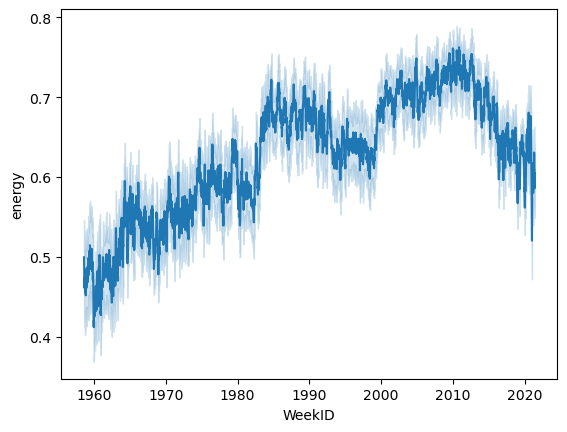

In [41]:
sns.lineplot(data = df_merge, x = "WeekID", y = "energy")

<Axes: xlabel='WeekID', ylabel='liveness'>

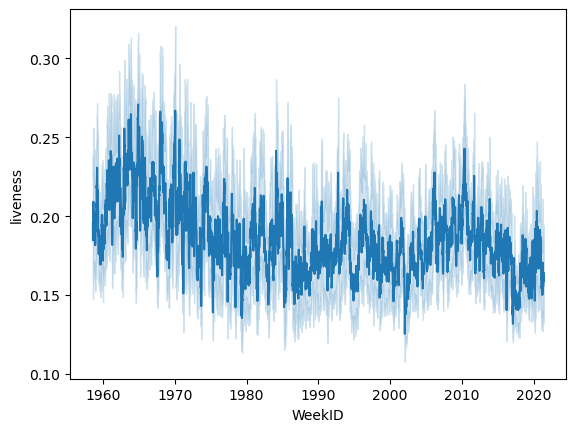

In [42]:
sns.lineplot(data = df_merge, x = "WeekID", y = "liveness")

In [101]:
df_filtered.columns

Index(['index_x', 'WeekID', 'Week Position', 'SongID', 'Instance',
       'Peak Position', 'Weeks on Chart', 'spotify_genre',
       'spotify_track_duration_ms', 'spotify_track_explicit',
       'spotify_track_album', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'spotify_track_popularity'],
      dtype='object')

<Axes: xlabel='WeekID', ylabel='energy'>

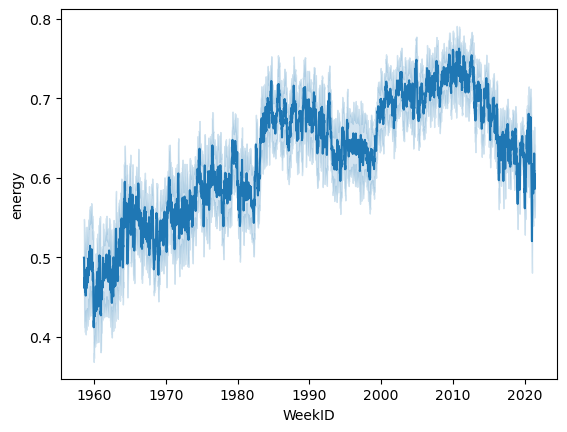

In [64]:
sns.lineplot(data = df_merge, x = "WeekID", y = "energy")

<Axes: xlabel='WeekID', ylabel='acousticness'>

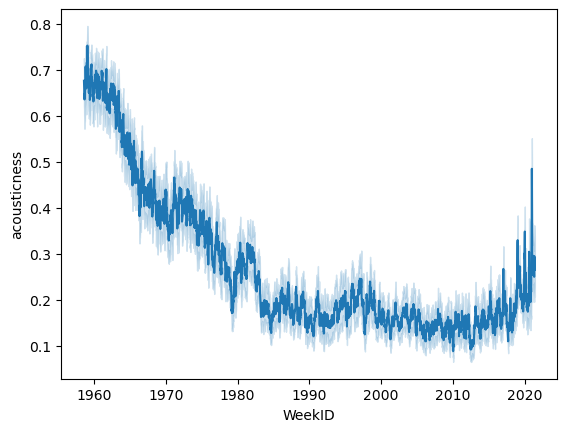

In [69]:
sns.lineplot(data = df_merge, x = "WeekID", y = "acousticness")

<Axes: xlabel='WeekID', ylabel='danceability'>

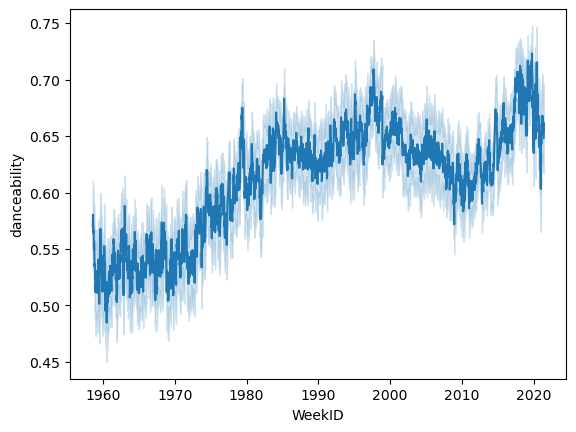

In [70]:
sns.lineplot(data = df_merge, x = "WeekID", y = "danceability")

<Axes: xlabel='WeekID', ylabel='tempo'>

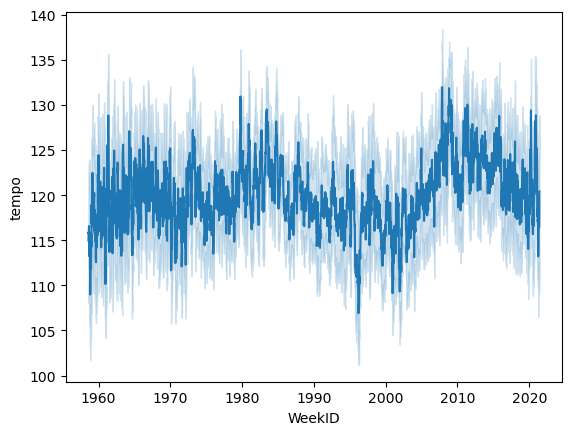

In [71]:
sns.lineplot(data = df_merge, x = "WeekID", y = "tempo")

<Axes: xlabel='WeekID', ylabel='loudness'>

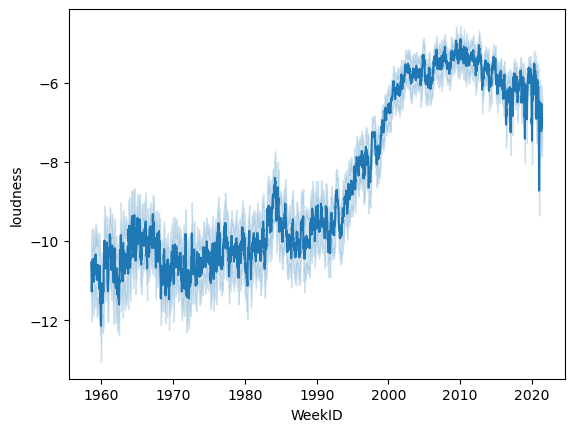

In [72]:
sns.lineplot(data = df_merge, x = "WeekID", y = "loudness")

<Axes: xlabel='WeekID', ylabel='liveness'>

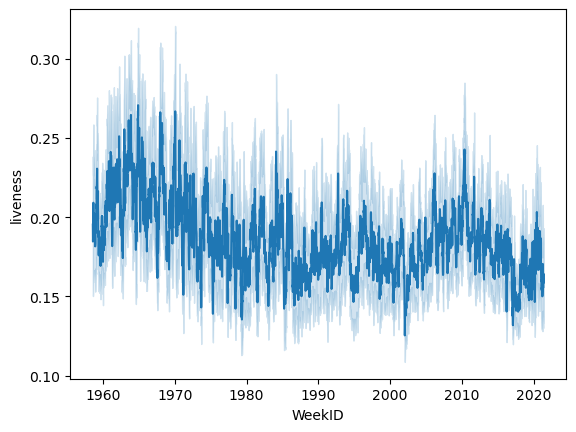

In [73]:
sns.lineplot(data = df_merge, x = "WeekID", y = "liveness")

In [5]:
## dropping non necessary columns. previous week position is dropped because it contains a lot of NAs. Redundant columns dropped. 
df_filtered = df_merge.drop(["Previous Week Position", "url", "spotify_track_id", "spotify_track_album", "spotify_track_preview_url", "index_y", "Performer_x", "Song_x", "Performer_y", "Song_y"], axis = 1)
df_filtered

index_x     WeekID  Week Position  \
0             0 1965-07-17             34   
1             1 1965-07-24             22   
2             2 1965-07-31             14   
3             3 1965-08-07             10   
4             4 1965-08-14              8   
...         ...        ...            ...   
330378   296356 1973-08-11             37   
330379   296357 1973-08-18             30   
330380   296358 1973-08-25             30   
330381   296359 1973-09-01             28   
330382   296360 1973-09-08             38   

                                                   SongID  Instance  \
0                        Don't Just Stand TherePatty Duke         1   
1                        Don't Just Stand TherePatty Duke         1   
2                        Don't Just Stand TherePatty Duke         1   
3                        Don't Just Stand TherePatty Duke         1   
4                        Don't Just Stand TherePatty Duke         1   
...                                                   ...       ...   
330378  You Light Up My Life/Believe In HumanityCarole...         1   
330379  You Light Up My Life/Believe In HumanityCarole...         1   
330380  You Light Up My Life/Believe In HumanityCarole...         1   
330381  You Light Up My Life/Believe In HumanityCarole...         1   
330382  You Light Up My Life/Believe In HumanityCarole...         1   

        Peak Position  Weeks on Chart  \
0                  34               4   
1                  22               5   
2                  14               6   
3                  10               7   
4                   8               8   
...               ...             ...   
330378             37               5   
330379             30               6   
330380             30               7   
330381             28               8   
330382             28               9   

                                            spotify_genre  \
0                                ['deep adult standards']   
1                                ['deep adult standards']   
2                                ['deep adult standards']   
3                                ['deep adult standards']   
4                                ['deep adult standards']   
...                                                   ...   
330378  ['adult standards', 'brill building pop', 'fol...   
330379  ['adult standards', 'brill building pop', 'fol...   
330380  ['adult standards', 'brill building pop', 'fol...   
330381  ['adult standards', 'brill building pop', 'fol...   
330382  ['adult standards', 'brill building pop', 'fol...   

        spotify_track_duration_ms spotify_track_explicit  ...  loudness  mode  \
0                        163160.0                  False  ...   -15.044   1.0   
1                        163160.0                  False  ...   -15.044   1.0   
2                        163160.0                  False  ...   -15.044   1.0   
3                        163160.0                  False  ...   -15.044   1.0   
4                        163160.0                  False  ...   -15.044   1.0   
...                           ...                    ...  ...       ...   ...   
330378                        NaN                    NaN  ...       NaN   NaN   
330379                        NaN                    NaN  ...       NaN   NaN   
330380                        NaN                    NaN  ...       NaN   NaN   
330381                        NaN                    NaN  ...       NaN   NaN   
330382                        NaN                    NaN  ...       NaN   NaN   

        speechiness  acousticness  instrumentalness  liveness  valence  \
0            0.0298          0.61          0.000077       0.1    0.568   
1            0.0298          0.61          0.000077       0.1    0.568   
2            0.0298          0.61          0.000077       0.1    0.568   
3            0.0298          0.61          0.000077       0.1    0.568   
4            0.0298          0.61          0.

In [6]:
#df_filtered = df_filtered.fillna(0)
df_filtered.dropna(inplace = True)
df_filtered

index_x     WeekID  Week Position                            SongID  \
0             0 1965-07-17             34  Don't Just Stand TherePatty Duke   
1             1 1965-07-24             22  Don't Just Stand TherePatty Duke   
2             2 1965-07-31             14  Don't Just Stand TherePatty Duke   
3             3 1965-08-07             10  Don't Just Stand TherePatty Duke   
4             4 1965-08-14              8  Don't Just Stand TherePatty Duke   
...         ...        ...            ...                               ...   
330369   296347 2011-07-02             42             You LieThe Band Perry   
330370   296348 2011-07-09             42             You LieThe Band Perry   
330371   296349 2011-07-16             44             You LieThe Band Perry   
330372   296350 2011-07-23             51             You LieThe Band Perry   
330373   296351 2011-07-30             59             You LieThe Band Perry   

        Instance  Peak Position  Weeks on Chart  \
0              1             34               4   
1              1             22               5   
2              1             14               6   
3              1             10               7   
4              1              8               8   
...          ...            ...             ...   
330369         1             42              16   
330370         1             42              17   
330371         1             42              18   
330372         1             42              19   
330373         1             42              20   

                                            spotify_genre  \
0                                ['deep adult standards']   
1                                ['deep adult standards']   
2                                ['deep adult standards']   
3                                ['deep adult standards']   
4                                ['deep adult standards']   
...                                                   ...   
330369  ['contemporary country', 'country', 'country d...   
330370  ['contemporary country', 'country', 'country d...   
330371  ['contemporary country', 'country', 'country d...   
330372  ['contemporary country', 'country', 'country d...   
330373  ['contemporary country', 'country', 'country d...   

        spotify_track_duration_ms spotify_track_explicit  ...  loudness  mode  \
0                        163160.0                  False  ...   -15.044   1.0   
1                        163160.0                  False  ...   -15.044   1.0   
2                        163160.0                  False  ...   -15.044   1.0   
3                        163160.0                  False  ...   -15.044   1.0   
4                        163160.0                  False  ...   -15.044   1.0   
...                           ...                    ...  ...       ...   ...   
330369                   214733.0                  False  ...    -5.015   1.0   
330370                   214733.0                  False  ...    -5.015   1.0   
330371                   214733.0                  False  ...    -5.015   1.0   
330372                   214733.0                  False  ...    -5.015   1.0   
330373                   214733.0                  False  ...    -5.015   1.0   

        speechiness  acousticness  instrumentalness  liveness  valence  \
0            0.0298         0.610          0.000077     0.100    0.568   
1            0.0298         0.610          0.000077     0.100    0.568   
2            0.0298         0.610          0.000077     0.100    0.568   
3            0.0298         0.610          0.000077     0.100    0.568   
4            0.0298         0.610          0.000077     0.100    0.568   
...             ...           ...               ...       ...      ...   
330369       0.0289         0.387          0.000000     0.143    0.598   
330370       0.0289         0.387          0.000000     0.143    0.598   
330371       0.0289         0.387          0.000000     0.143    0.598   


In [7]:
print("The count of NAs per column: ")
df_filtered.isna().sum()

The count of NAs per column: 


index_x                      0
WeekID                       0
Week Position                0
SongID                       0
Instance                     0
Peak Position                0
Weeks on Chart               0
spotify_genre                0
spotify_track_duration_ms    0
spotify_track_explicit       0
danceability                 0
energy                       0
key                          0
loudness                     0
mode                         0
speechiness                  0
acousticness                 0
instrumentalness             0
liveness                     0
valence                      0
tempo                        0
time_signature               0
spotify_track_popularity     0
dtype: int64

In [8]:
df_chronological = df_filtered.sort_values("WeekID")
df_chronological

index_x     WeekID  Week Position  \
26597      2304 1958-08-02             16   
307518   146293 1958-08-02             68   
138422    18553 1958-08-02             63   
93732      9516 1958-08-02             84   
320203   200089 1958-08-02             57   
...         ...        ...            ...   
139664   233879 2021-05-29             71   
313424   152154 2021-05-29             78   
268833    87101 2021-05-29             53   
304664   133157 2021-05-29             45   
248439   306380 2021-05-29             56   

                                                   SongID  Instance  \
26597                        One Summer NightThe Danleers         1   
307518         Volare (Nel Blu Dipinto Di Blu)Dean Martin         1   
138422  High School ConfidentialJerry Lee Lewis And Hi...         1   
93732                       Summertime BluesEddie Cochran         1   
320203                          You Need HandsEydie Gorme         1   
...                                                   ...       ...   
139664                           Glad You ExistDan + Shay         1   
313424              White TeethYoungBoy Never Broke Again         1   
268833                             Time TodayMoneybagg Yo         1   
304664                   What You Know Bout LovePop Smoke         2   
248439                              Made For YouJake Owen         1   

        Peak Position  Weeks on Chart  \
26597              16               1   
307518             68               1   
138422             63               1   
93732              84               1   
320203             57               1   
...               ...             ...   
139664             63              15   
313424             78               1   
268833             31              15   
304664              9              37   
248439             32              13   

                                            spotify_genre  \
26597                                         ['doo-wop']   
307518    ['adult standards', 'easy listening', 'lounge']   
138422                                                 []   
93732   ['adult standards', 'brill building pop', 'roc...   
320203                      ['adult standards', 'bolero']   
...                                                   ...   
139664         ['contemporary country', 'country', 'pop']   
313424                        ['baton rouge rap', 'trap']   
268833  ['hip hop', 'memphis hip hop', 'rap', 'souther...   
304664                                 ['brooklyn drill']   
248439  ['contemporary country', 'country', 'country r...   

        spotify_track_duration_ms spotify_track_explicit  ...  loudness  mode  \
26597                    133178.0                  False  ...    -6.889   1.0   
307518                   142000.0                  False  ...   -10.826   1.0   
138422                   150026.0                  False  ...    -6.792   1.0   
93732                    119360.0                  False  ...    -8.610   0.0   
320203                   147066.0                  False  ...   -14.139   1.0   
...                           ...                    ...  ...       ...   ...   
139664                   144533.0                  False  ...    -6.120   1.0   
313424                   174683.0                   True  ...    -7.115   0.0   
268833                   136899.0                   True  ...    -7.686   1.0   
304664                   160000.0                   True  ...    -8.493   1.0   
248439                   238400.0                  False  ...    -6.829   1.0   

        speechiness  acousticness  instrumentalness  liveness  valence  \
26597        0.0286        0.8830          0.000000    0.2880    0.514   
307518       0.0663        0.8230          0.000000    0.4960    0.551   
138422       0.0422        0.7140          0.000000    0.1380    0.965   
93732        0.0593        0.1230          0.107000    0.1750    0.957   
320203       0.0637        0.3330          0.

In [24]:
df_number1_hits = df_filtered[df_filtered["Week Position"] == 1]
df_number1_hits

index_x     WeekID  Week Position  \
166         654 1977-04-23              1   
496       93023 2003-02-01              1   
939       98555 1962-01-27              1   
945      185992 1962-02-03              1   
946      190612 1962-02-10              1   
...         ...        ...            ...   
329579   295557 1986-11-29              1   
330016   295994 1974-11-02              1   
330043   296021 1987-06-06              1   
330057   296035 1966-11-19              1   
330058   296036 1966-11-26              1   

                                                   SongID  Instance  \
166                 Don't Leave Me This WayThelma Houston         1   
496                        Bump, Bump, BumpB2K & P. Diddy         1   
939     Peppermint Twist - Part IJoey Dee & the Starli...         1   
945     Peppermint Twist - Part IJoey Dee & the Starli...         1   
946     Peppermint Twist - Part IJoey Dee & the Starli...         1   
...                                                   ...       ...   
329579                   You Give Love A Bad NameBon Jovi         1   
330016               You Haven't Done NothinStevie Wonder         1   
330043                    You Keep Me Hangin' OnKim Wilde         1   
330057                 You Keep Me Hangin' OnThe Supremes         1   
330058                 You Keep Me Hangin' OnThe Supremes         1   

        Peak Position  Weeks on Chart  \
166                 1              19   
496                 1              10   
939                 1              11   
945                 1              12   
946                 1              13   
...               ...             ...   
329579              1              13   
330016              1              14   
330043              1              11   
330057              1               4   
330058              1               5   

                                            spotify_genre  \
166                     ['disco', 'diva house', 'motown']   
496     ['boy band', 'dance pop', 'hip pop', 'pop rap'...   
939                            ['australian talent show']   
945                            ['australian talent show']   
946                            ['australian talent show']   
...                                                   ...   
329579                             ['glam metal', 'rock']   
330016  ['adult standards', 'motown', 'quiet storm', '...   
330043  ['dance pop', 'dance rock', 'europop', 'new ro...   
330057  ['adult standards', 'brill building pop', 'cla...   
330058  ['adult standards', 'brill building pop', 'cla...   

        spotify_track_duration_ms spotify_track_explicit  ...  loudness  mode  \
166                      217733.0                  False  ...    -9.745   0.0   
496                      282533.0                  False  ...    -6.028   0.0   
939                      259266.0                  False  ...   -14.825   1.0   
945                      259266.0                  False  ...   -14.825   1.0   
946                      259266.0                  False  ...   -14.825   1.0   
...                           ...                    ...  ...       ...   ...   
329579                   222706.0                  False  ...    -2.947   0.0   
330016                   202706.0                  False  ...    -9.978   0.0   
330043                   255220.0                  False  ...   -12.140   0.0   
330057                   163280.0                  False  ...    -7.004   0.0   
330058                   163280.0                  False  ...    -7.004   0.0   

        speechiness  acousticness  instrumentalness  liveness  valence  \
166          0.0594        0.0972          0.000010    0.0917    0.673   
496          0.2150        0.0956          0.000000    0.0414    0.887   
939          0.0527        0.8810          0.326000    0.1850    0.826   
945          0.0527        0.8810          0.326000    0.1850    0.826   
946          0.0527        0.8810          0.

<Axes: xlabel='mode', ylabel='Count'>

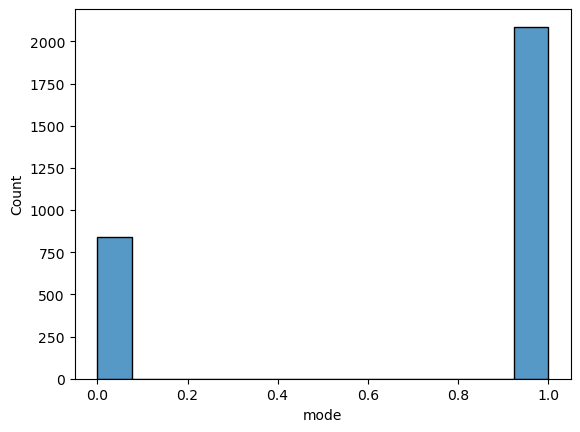

In [218]:
sns.histplot(data = df_number1_hits, x = "mode")

<Axes: xlabel='liveness', ylabel='Count'>

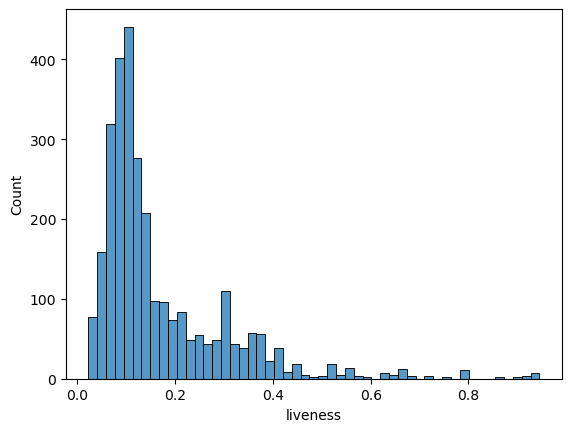

In [219]:
sns.histplot(data = df_number1_hits, x = "liveness")

<Axes: xlabel='time_signature', ylabel='Count'>

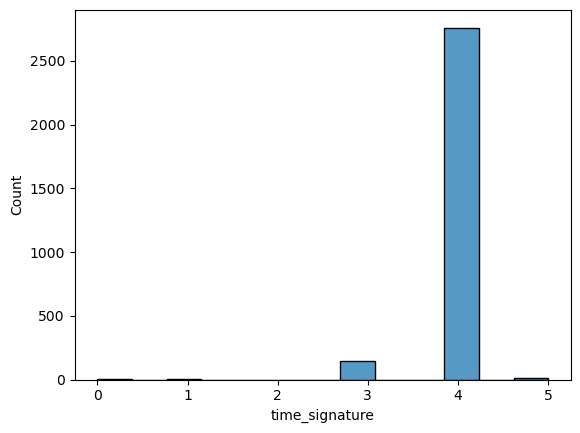

In [220]:
sns.histplot(data = df_number1_hits, x = "time_signature")

<Axes: xlabel='loudness', ylabel='Count'>

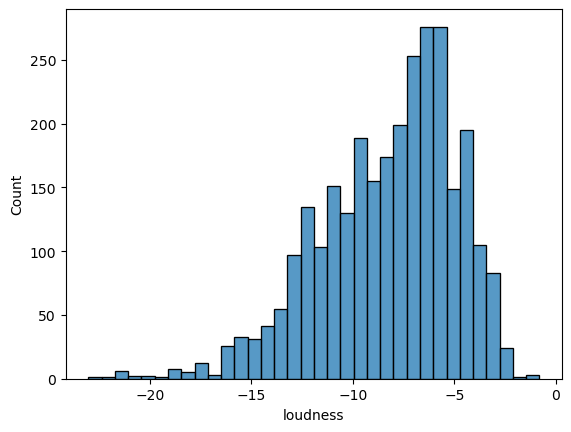

In [221]:
sns.histplot(data = df_number1_hits, x = "loudness")

In [183]:
df_ranked_number1 = df_number1_hits.groupby("SongID").size().sort_values(ascending = False)
df_ranked_number1

SongID
Old Town RoadLil Nas X Featuring Billy Ray Cyrus              38
One Sweet DayMariah Carey & Boyz II Men                       16
DespacitoLuis Fonsi & Daddy Yankee Featuring Justin Bieber    16
I'll Make Love To YouBoyz II Men                              14
We Belong TogetherMariah Carey                                14
                                                              ..
Lost In EmotionLisa Lisa And Cult Jam                          1
Lose You To Love MeSelena Gomez                                1
Looks Like We Made ItBarry Manilow                             1
Live To TellMadonna                                            1
Let's Stay TogetherAl Green                                    1
Length: 1124, dtype: int64

Text(0.5, 1.0, 'Genre Counts')

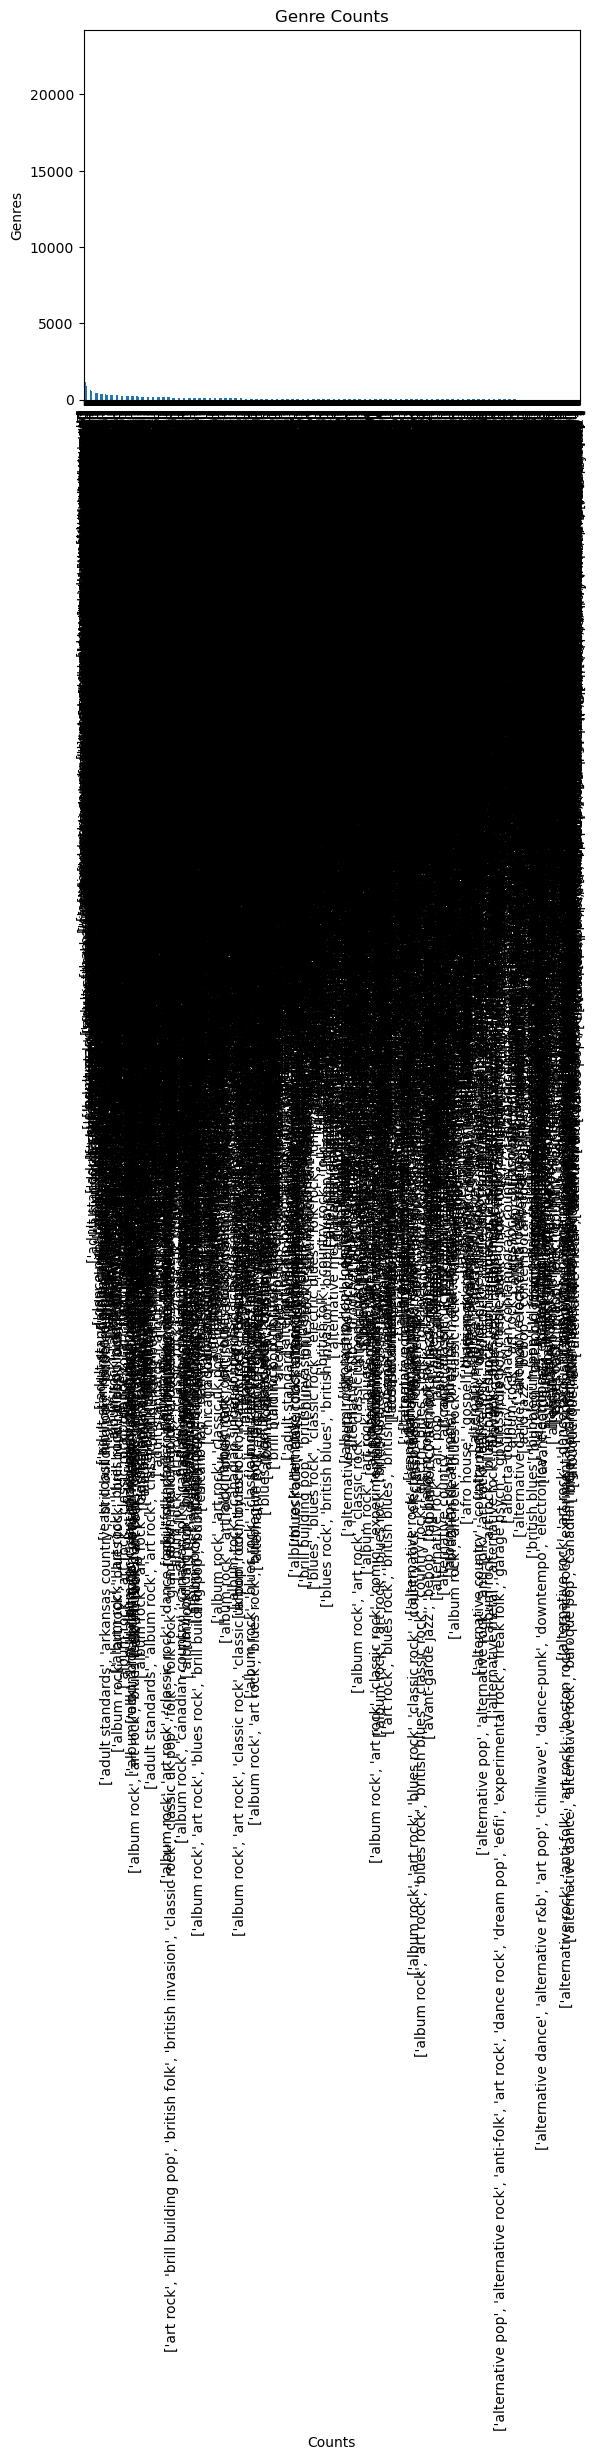

In [13]:
df_filtered["spotify_genre"].value_counts().plot.bar()
plt.xlabel("Counts")
plt.ylabel("Genres")
plt.title("Genre Counts")

In [ ]:
## look at top 10 vs top 50? similarities between them
## trends as time change: what is the biggest difference between songs back then and now
##### being able to predict popularity of song (#1 hit?, top 10 hit?, use peak position) random forrest classifier with and without spotify popularity column, above or below 50% spotify popularity?
##### can we predict time in top 100? time on charts analysis: linear regression, which coefficient contributes the most?
## seeing what attributes contribute to longevity within the billboard top 100: sort by weeks on chart
## seeing what generes become more popular over time, which genres are popular by decade
## Genre classification: using decision trees, might be hard with so many genres 
## Identify musical clusters: k means analysis across certain song attributes, comparing over time how clusters have changed?
##### What features correlate most strongly with spotify popularity on billboard charts
## The rise of explicit songs over time? WHich decade has the most explicit songs, How has explicit songs popularity changed over time
## Which decade has the most popular songs? danceable songs?

In [41]:
split_genres = df_filtered['spotify_genre'].str.replace('[', '').str.replace(']', '').str.split(', ').explode()
unique_genres = set(split_genres)
genre_counts = split_genres.value_counts()

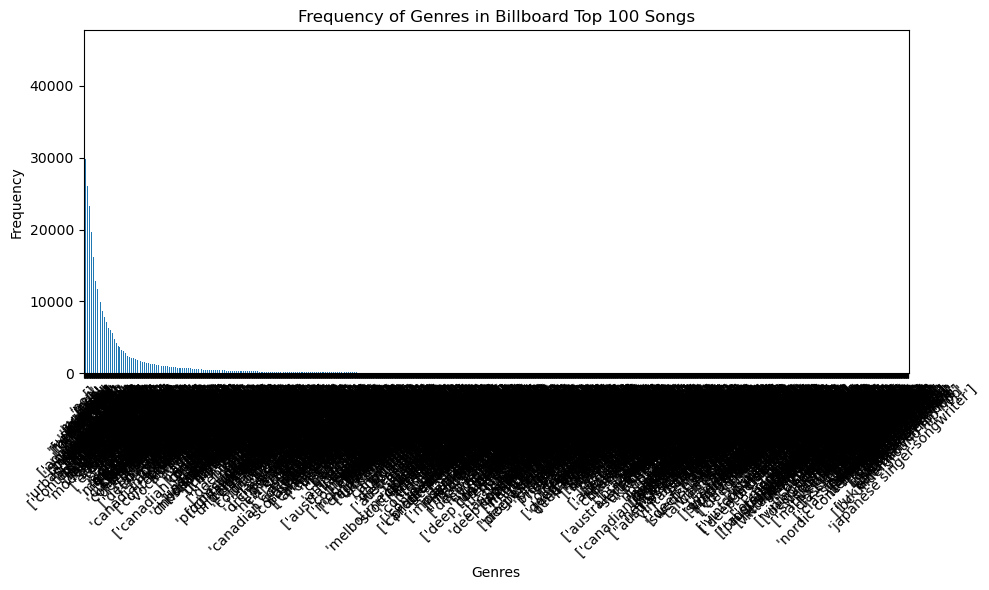

In [26]:
plt.figure(figsize=(10, 6))  
genre_counts.plot.bar()
plt.title('Frequency of Genres in Billboard Top 100 Songs')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

In [37]:
genre_counts

spotify_genre
'dance pop'           48245
'mellow gold'         47410
'soft rock'           46859
'pop'                 46327
'rock'                39336
                      ...  
'western swing'           1
'arkansas hip hop'        1
'k-rap'                   1
'vapor pop'               1
'chicago punk'            1
Name: count, Length: 1146, dtype: int64

In [38]:
top_100_genres = genre_counts[0:100]
top_100_genres

spotify_genre
'dance pop'               48245
'mellow gold'             47410
'soft rock'               46859
'pop'                     46327
'rock'                    39336
                          ...  
'melodic rap'              2692
'deep adult standards'     2676
'oklahoma country'         2659
'northern soul'            2525
'traditional folk'         2512
Name: count, Length: 100, dtype: int64

<Figure size 1500x2000 with 0 Axes>

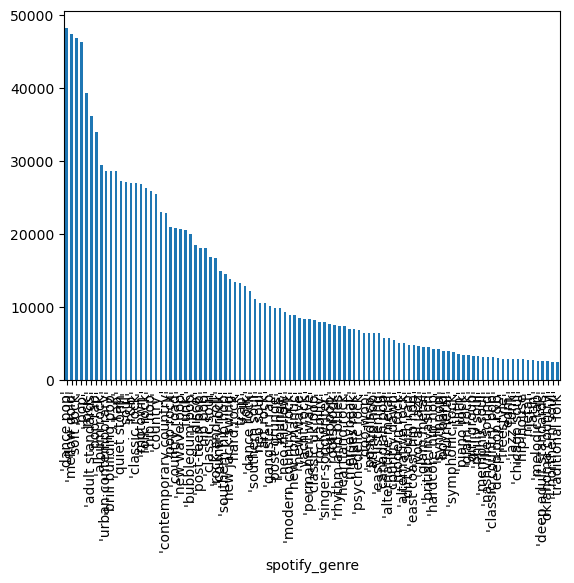

<Figure size 1500x2000 with 0 Axes>

In [39]:
top_100_genres.plot.bar()
plt.figure(figsize=(15, 20))  

<Figure size 3000x2000 with 0 Axes>

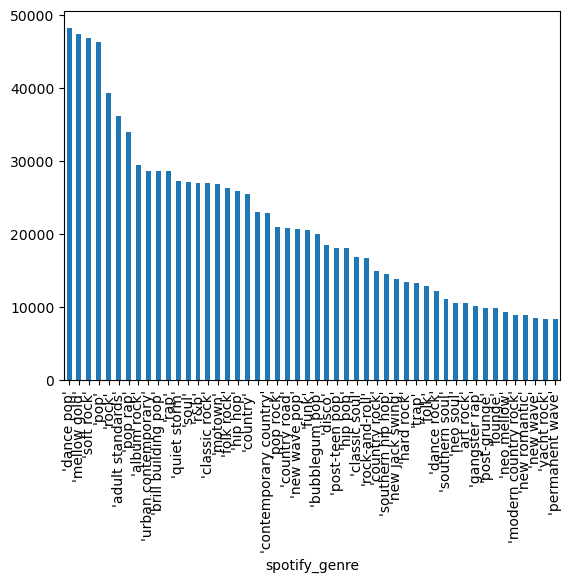

<Figure size 3000x2000 with 0 Axes>

In [168]:
top_50_genres = genre_counts[0:50]
top_50_genres.plot.bar()
plt.figure(figsize=(30, 20))  

Creating new df with just the numeric song features present. 

In [9]:
numeric_columns = ['WeekID', 'Week Position', 'SongID', 'Instance', 'Peak Position', 'Weeks on Chart','spotify_track_duration_ms','danceability', 'energy', 'key', 'loudness','mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness','valence', 'tempo', 'time_signature', 'spotify_track_popularity']
df_numeric = df_filtered[numeric_columns]
df_numeric

WeekID  Week Position                            SongID  Instance  \
0      1965-07-17             34  Don't Just Stand TherePatty Duke         1   
1      1965-07-24             22  Don't Just Stand TherePatty Duke         1   
2      1965-07-31             14  Don't Just Stand TherePatty Duke         1   
3      1965-08-07             10  Don't Just Stand TherePatty Duke         1   
4      1965-08-14              8  Don't Just Stand TherePatty Duke         1   
...           ...            ...                               ...       ...   
330369 2011-07-02             42             You LieThe Band Perry         1   
330370 2011-07-09             42             You LieThe Band Perry         1   
330371 2011-07-16             44             You LieThe Band Perry         1   
330372 2011-07-23             51             You LieThe Band Perry         1   
330373 2011-07-30             59             You LieThe Band Perry         1   

        Peak Position  Weeks on Chart  spotify_track_duration_ms  \
0                  34               4                   163160.0   
1                  22               5                   163160.0   
2                  14               6                   163160.0   
3                  10               7                   163160.0   
4                   8               8                   163160.0   
...               ...             ...                        ...   
330369             42              16                   214733.0   
330370             42              17                   214733.0   
330371             42              18                   214733.0   
330372             42              19                   214733.0   
330373             42              20                   214733.0   

        danceability  energy  key  loudness  mode  speechiness  acousticness  \
0              0.574   0.256  7.0   -15.044   1.0       0.0298         0.610   
1              0.574   0.256  7.0   -15.044   1.0       0.0298         0.610   
2              0.574   0.256  7.0   -15.044   1.0       0.0298         0.610   
3              0.574   0.256  7.0   -15.044   1.0       0.0298         0.610   
4              0.574   0.256  7.0   -15.044   1.0       0.0298         0.610   
...              ...     ...  ...       ...   ...          ...           ...   
330369         0.521   0.656  6.0    -5.015   1.0       0.0289         0.387   
330370         0.521   0.656  6.0    -5.015   1.0       0.0289         0.387   
330371         0.521   0.656  6.0    -5.015   1.0       0.0289         0.387   
330372         0.521   0.656  6.0    -5.015   1.0       0.0289         0.387   
330373         0.521   0.656  6.0    -5.015   1.0       0.0289         0.387   

        instrumentalness  liveness  valence    tempo  time_signature  \
0               0.000077     0.100    0.568   82.331             3.0   
1               0.000077     0.100    0.568   82.331             3.0   
2               0.000077     0.100    0.568   82.331             3.0   
3               0.000077     0.100    0.568   82.331             3.0   
4               0.000077     0.100    0.568   82.331             3.0   
...                  ...       ...      ...      ...             ...   
330369          0.000000     0.143    0.598  170.939             4.0   
330370          0.000000     0.143    0.598  170.939             4.0   
330371          0.000000     0.143    0.598  170.939             4.0   
330372          0.000000     0.143    0.598  170.939             4.0   
330373          0.000000     0.143    0.598  170.939             4.0   

        spotify_track_popularity  
0                           21.0  
1                           21.0  
2                           21.0  
3                           21.0  
4                           21.0  
...                          ...  
330369                      50.0  
330370                      50.0  
330371                      50.0  
330372                      50.0  
330373                

In [118]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330383 entries, 0 to 330382
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   WeekID                     330383 non-null  datetime64[ns]
 1   Week Position              330383 non-null  int64         
 2   SongID                     330383 non-null  object        
 3   Instance                   330383 non-null  int64         
 4   Peak Position              330383 non-null  int64         
 5   Weeks on Chart             330383 non-null  int64         
 6   spotify_track_duration_ms  330383 non-null  float64       
 7   danceability               330383 non-null  float64       
 8   energy                     330383 non-null  float64       
 9   key                        330383 non-null  float64       
 10  loudness                   330383 non-null  float64       
 11  mode                       330383 non-null  float64 

In [11]:
df_numeric.set_index("SongID")

WeekID  Week Position  Instance  \
SongID                                                                 
Don't Just Stand TherePatty Duke 1965-07-17             34         1   
Don't Just Stand TherePatty Duke 1965-07-24             22         1   
Don't Just Stand TherePatty Duke 1965-07-31             14         1   
Don't Just Stand TherePatty Duke 1965-08-07             10         1   
Don't Just Stand TherePatty Duke 1965-08-14              8         1   
...                                     ...            ...       ...   
You LieThe Band Perry            2011-07-02             42         1   
You LieThe Band Perry            2011-07-09             42         1   
You LieThe Band Perry            2011-07-16             44         1   
You LieThe Band Perry            2011-07-23             51         1   
You LieThe Band Perry            2011-07-30             59         1   

                                  Peak Position  Weeks on Chart  \
SongID                                                            
Don't Just Stand TherePatty Duke             34               4   
Don't Just Stand TherePatty Duke             22               5   
Don't Just Stand TherePatty Duke             14               6   
Don't Just Stand TherePatty Duke             10               7   
Don't Just Stand TherePatty Duke              8               8   
...                                         ...             ...   
You LieThe Band Perry                        42              16   
You LieThe Band Perry                        42              17   
You LieThe Band Perry                        42              18   
You LieThe Band Perry                        42              19   
You LieThe Band Perry                        42              20   

                                  spotify_track_duration_ms  danceability  \
SongID                                                                      
Don't Just Stand TherePatty Duke                   163160.0         0.574   
Don't Just Stand TherePatty Duke                   163160.0         0.574   
Don't Just Stand TherePatty Duke                   163160.0         0.574   
Don't Just Stand TherePatty Duke                   163160.0         0.574   
Don't Just Stand TherePatty Duke                   163160.0         0.574   
...                                                     ...           ...   
You LieThe Band Perry                              214733.0         0.521   
You LieThe Band Perry                              214733.0         0.521   
You LieThe Band Perry                              214733.0         0.521   
You LieThe Band Perry                              214733.0         0.521   
You LieThe Band Perry                              214733.0         0.521   

                                  energy  key  loudness  mode  speechiness  \
SongID                                                                       
Don't Just Stand TherePatty Duke   0.256  7.0   -15.044   1.0       0.0298   
Don't Just Stand TherePatty Duke   0.256  7.0   -15.044   1.0       0.0298   
Don't Just Stand TherePatty Duke   0.256  7.0   -15.044   1.0       0.0298   
Don't Just Stand TherePatty Duke   0.256  7.0   -15.044   1.0       0.0298   
Don't Just Stand TherePatty Duke   0.256  7.0   -15.044   1.0       0.0298   
...                                  ...  ...       ...   ...          ...   
You LieThe Band Perry              0.656  6.0    -5.015   1.0       0.0289   
You LieThe Band Perry              0.656  6.0    -5.015   1.0       0.0289   
You LieThe Band Perry              0.656  6.0    -5.015   1.0       0.0289   
You LieThe Band Perry              0.656  6.0    -5.015   1.0       0.0289   
You LieThe Band Perry              0.656  6.0    -5.015   1.0       0.0289   

                                  acousticness  instrumentalness  liveness  \
SongID                                                                       
Don't Just Stand TherePatty Duke         0.610         

array([[<Axes: title={'center': 'WeekID'}>,
        <Axes: title={'center': 'Week Position'}>,
        <Axes: title={'center': 'Instance'}>,
        <Axes: title={'center': 'Peak Position'}>],
       [<Axes: title={'center': 'Weeks on Chart'}>,
        <Axes: title={'center': 'spotify_track_duration_ms'}>,
        <Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'energy'}>],
       [<Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'mode'}>,
        <Axes: title={'center': 'speechiness'}>],
       [<Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'valence'}>],
       [<Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'time_signature'}>,
        <Axes: title={'center': 'spotify_track_popularity'}>, <Axes: >]],
      dtype=object)

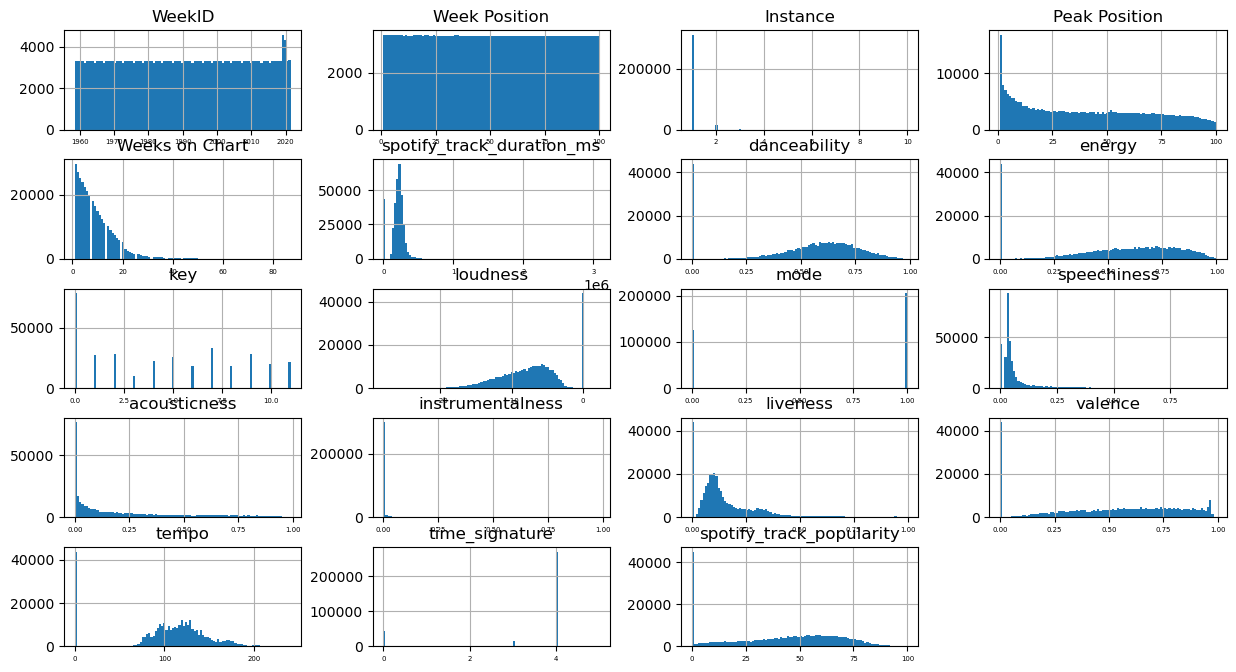

In [75]:
df_numeric.hist(figsize = (15,8), bins = 100, xlabelsize = 5)

In [12]:
df_filtered.sort_values('spotify_track_popularity', ascending = False)

index_x     WeekID  Week Position  \
193652   290881 2020-02-29              4   
35498    166951 2021-04-24              2   
193644   275153 2020-05-02             31   
193637   271094 2020-03-14              8   
193638   271993 2020-03-21             12   
...         ...        ...            ...   
195720    33059 1973-06-16             97   
195721    36480 1973-06-23             95   
195722    48971 1973-06-30             87   
195723    65661 1973-07-07             85   
88890    138123 1963-07-27             60   

                                         SongID  Instance  Peak Position  \
193652                  Dance MonkeyTones And I         1              4   
35498   Montero (Call Me By Your Name)Lil Nas X         1              1   
193644                  Dance MonkeyTones And I         1              4   
193637                  Dance MonkeyTones And I         1              4   
193638                  Dance MonkeyTones And I         1              4   
...                                         ...       ...            ...   
195720                     BlockbusterThe Sweet         1             97   
195721                     BlockbusterThe Sweet         1             95   
195722                     BlockbusterThe Sweet         1             87   
195723                     BlockbusterThe Sweet         1             85   
88890                          BrendaThe Cupids         1             60   

        Weeks on Chart                                      spotify_genre  \
193652              20                                 ['australian pop']   
35498                3  ['country rap', 'lgbtq+ hip hop', 'pop rap', '...   
193644              29                                 ['australian pop']   
193637              22                                 ['australian pop']   
193638              23                                 ['australian pop']   
...                ...                                                ...   
195720               1                                     ['indie folk']   
195721               2                                     ['indie folk']   
195722               3                                     ['indie folk']   
195723               4                                     ['indie folk']   
88890                4                                                 []   

        spotify_track_duration_ms spotify_track_explicit  ...  loudness  mode  \
193652                   209438.0                  False  ...    -6.400   0.0   
35498                    137875.0                   True  ...    -6.682   0.0   
193644                   209438.0                  False  ...    -6.400   0.0   
193637                   209438.0                  False  ...    -6.400   0.0   
193638                   209438.0                  False  ...    -6.400   0.0   
...                           ...                    ...  ...       ...   ...   
195720                   204149.0                  False  ...   -12.099   1.0   
195721                   204149.0                  False  ...   -12.099   1.0   
195722                   204149.0                  False  ...   -12.099   1.0   
195723                   204149.0                  False  ...   -12.099   1.0   
88890                    171120.0                  False  ...    -7.171   1.0   

        speechiness  acousticness  instrumentalness  liveness  valence  \
193652       0.0924        0.6920          0.000104     0.149    0.513   
35498        0.1520        0.2970          0.000000     0.384    0.758   
193644       0.0924        0.6920          0.000104     0.149    0.513   
193637       0.0924        0.6920          0.000104     0.149    0.513   
193638       0.0924        0.6920          0.000104     0.149    0.513   
...             ...           ...               ...       ...      ...   
195720       0.0388        0.0898          0.264000     0.436    0.508   
195721       0.0388        0.0898          0.264000     0.436   

In [13]:
df_songs = df_filtered.groupby(['SongID']).agg({'spotify_track_popularity': 'max'})
df_songs

spotify_track_popularity
SongID                                                                     
"B" GirlsYoung And Restless                                            20.0
"Cherry Cherry" from Hot August NightNeil Diamond                      16.0
#1 Dee JayGoody Goody                                                   0.0
#1Nelly                                                                50.0
#9 DreamJohn Lennon                                                    55.0
...                                                                     ...
povAriana Grande                                                       81.0
sobeautifulMusiq Soulchild                                             59.0
teachmeMusiq Soulchild                                                 57.0
whoa (mind in awe)XXXTENTACION                                         77.0
whoknowsMusiq                                                          39.0

[24077 rows x 1 columns]

In [15]:
df_spotify_popular_songs = df_songs.sort_values('spotify_track_popularity', ascending = False)
df_spotify_popular_songs

spotify_track_popularity
SongID                                                             
Montero (Call Me By Your Name)Lil Nas X                       100.0
Dance MonkeyTones And I                                       100.0
RoxanneArizona Zervas                                          99.0
CirclesPost Malone                                             98.0
MemoriesMaroon 5                                               98.0
...                                                             ...
Amerikan MusicSteve Alaimo                                      0.0
Johnny WillowFred Darian                                        0.0
FireSubway                                                      0.0
I've Got The Music In MeThe Kiki Dee Band                       0.0
Ay, Dios Mio!Karol G                                            0.0

[24077 rows x 1 columns]

In [16]:
df_spotify_popular_songs[0:100]

spotify_track_popularity
SongID                                                           
Montero (Call Me By Your Name)Lil Nas X                     100.0
Dance MonkeyTones And I                                     100.0
RoxanneArizona Zervas                                        99.0
CirclesPost Malone                                           98.0
MemoriesMaroon 5                                             98.0
...                                                           ...
Build A BitchBella Poarch                                    88.0
Jocelyn FloresXXXTentacion                                   88.0
Bury A FriendBillie Eilish                                   88.0
Sad!XXXTENTACION                                             88.0
Up All NightKhalid                                           88.0

[100 rows x 1 columns]

## Research Question #1: Can we predict how many weeks each song is on the Billboard top 100 charts? Can we use the audio features of the song to predict how popular the song will be and for how long?

In [17]:
df_filtered.groupby(['SongID']).agg({'Weeks on Chart': 'max'}).sort_values('Weeks on Chart', ascending = False)

Weeks on Chart
SongID                                                            
RadioactiveImagine Dragons                                      87
SailAWOLNATION                                                  79
I'm YoursJason Mraz                                             76
Blinding LightsThe Weeknd                                       76
How Do I LiveLeAnn Rimes                                        69
...                                                            ...
My AnswerJimmy McCracklin                                        1
Mutha***** UpTyga Featuring Nicki Minaj                          1
Must've Never Met YouLuke Combs                                  1
Shut Up About PoliticsJohn Rich Featuring The Five               1
Chicken TendiesClinton Kane                                      1

[24077 rows x 1 columns]

In [26]:
df_weeks_on_chart = df_filtered.groupby(['SongID']).max()
df_weeks_on_chart

index_x     WeekID  \
SongID                                                                  
"B" GirlsYoung And Restless                         262128 1990-08-11   
"Cherry Cherry" from Hot August NightNeil Diamond   157486 1973-05-19   
#1 Dee JayGoody Goody                               154424 1978-12-16   
#1Nelly                                             290014 2002-03-02   
#9 DreamJohn Lennon                                 189038 1975-03-08   
...                                                    ...        ...   
povAriana Grande                                    300225 2021-05-29   
sobeautifulMusiq Soulchild                          303125 2009-06-27   
teachmeMusiq Soulchild                               14499 2007-10-06   
whoa (mind in awe)XXXTENTACION                      153321 2019-01-12   
whoknowsMusiq                                       153376 2004-07-17   

                                                   Week Position  Instance  \
SongID                                                                       
"B" GirlsYoung And Restless                                   91         1   
"Cherry Cherry" from Hot August NightNeil Diamond             84         1   
#1 Dee JayGoody Goody                                         99         1   
#1Nelly                                                       75         1   
#9 DreamJohn Lennon                                           68         1   
...                                                          ...       ...   
povAriana Grande                                              85         2   
sobeautifulMusiq Soulchild                                    98         3   
teachmeMusiq Soulchild                                        92         1   
whoa (mind in awe)XXXTENTACION                                96         2   
whoknowsMusiq                                                100         1   

                                                   Peak Position  \
SongID                                                             
"B" GirlsYoung And Restless                                   84   
"Cherry Cherry" from Hot August NightNeil Diamond             84   
#1 Dee JayGoody Goody                                         88   
#1Nelly                                                       75   
#9 DreamJohn Lennon                                           68   
...                                                          ...   
povAriana Grande                                              81   
sobeautifulMusiq Soulchild                                    98   
teachmeMusiq Soulchild                                        92   
whoa (mind in awe)XXXTENTACION                                96   
whoknowsMusiq                                                 75   

                                                   Weeks on Chart  \
SongID                                                              
"B" GirlsYoung And Restless                                    15   
"Cherry Cherry" from Hot August NightNeil Diamond              10   
#1 Dee JayGoody Goody                                           5   
#1Nelly                                                        20   
#9 DreamJohn Lennon                                            12   
...                                                           ...   
povAriana Grande                                               11   
sobeautifulMusiq Soulchild                                     11   
teachmeMusiq Soulchild                                         20   
whoa (mind in awe)XXXTENTACION                                  3   
whoknowsMusiq                                                  13   

                                                                                       spotify_genre  \
SongID                                                                                                 
"B" GirlsYoung And Restless                                                                    

In [27]:
df_numeric_weeks_on_chart = df_weeks_on_chart.drop(['index_x', 'WeekID', 'Week Position', 'Instance', 'Peak Position', 'spotify_genre', 'spotify_track_explicit'], axis = 1)
df_numeric_weeks_on_chart

Weeks on Chart  \
SongID                                                              
"B" GirlsYoung And Restless                                    15   
"Cherry Cherry" from Hot August NightNeil Diamond              10   
#1 Dee JayGoody Goody                                           5   
#1Nelly                                                        20   
#9 DreamJohn Lennon                                            12   
...                                                           ...   
povAriana Grande                                               11   
sobeautifulMusiq Soulchild                                     11   
teachmeMusiq Soulchild                                         20   
whoa (mind in awe)XXXTENTACION                                  3   
whoknowsMusiq                                                  13   

                                                   spotify_track_duration_ms  \
SongID                                                                         
"B" GirlsYoung And Restless                                         242106.0   
"Cherry Cherry" from Hot August NightNeil Diamond                   443320.0   
#1 Dee JayGoody Goody                                               206106.0   
#1Nelly                                                             198760.0   
#9 DreamJohn Lennon                                                 286813.0   
...                                                                      ...   
povAriana Grande                                                    201882.0   
sobeautifulMusiq Soulchild                                          291133.0   
teachmeMusiq Soulchild                                              260017.0   
whoa (mind in awe)XXXTENTACION                                      157776.0   
whoknowsMusiq                                                       295320.0   

                                                   danceability  energy  key  \
SongID                                                                         
"B" GirlsYoung And Restless                               0.615   0.497  7.0   
"Cherry Cherry" from Hot August NightNeil Diamond         0.340   0.948  9.0   
#1 Dee JayGoody Goody                                     0.859   0.376  7.0   
#1Nelly                                                   0.792   0.600  7.0   
#9 DreamJohn Lennon                                       0.406   0.597  0.0   
...                                                         ...     ...  ...   
povAriana Grande                                          0.487   0.534  0.0   
sobeautifulMusiq Soulchild                                0.689   0.562  7.0   
teachmeMusiq Soulchild                                    0.499   0.610  8.0   
whoa (mind in awe)XXXTENTACION                            0.735   0.525  6.0   
whoknowsMusiq                                             0.419   0.694  2.0   

                                                   loudness  mode  \
SongID                                                              
"B" GirlsYoung And Restless                         -11.913   1.0   
"Cherry Cherry" from Hot August NightNeil Diamond    -5.061   1.0   
#1 Dee JayGoody Goody                               -16.542   0.0   
#1Nelly                                              -6.157   1.0   
#9 DreamJohn Lennon                                 -11.745   1.0   
...                                                     ...   ...   
povAriana Grande                                     -5.664   0.0   
sobeautifulMusiq Soulchild                           -7.048   0.0   
teachmeMusiq Soulchild                               -5.110   0.0   
whoa (mind in awe)XXXTENTACION                       -2.939   0.0   
whoknowsMusiq                                        -6.144   1.0   

                                                   speechiness  acousticness  \
SongID                                                                         
"B" GirlsYoun

In [46]:
X_data_weeks = df_numeric_weeks_on_chart.drop('Weeks on Chart', axis = 1)
y_target_weeks = df_numeric_weeks_on_chart['Weeks on Chart']

In [47]:
X_data_weeks

spotify_track_duration_ms  \
SongID                                                                         
"B" GirlsYoung And Restless                                         242106.0   
"Cherry Cherry" from Hot August NightNeil Diamond                   443320.0   
#1 Dee JayGoody Goody                                               206106.0   
#1Nelly                                                             198760.0   
#9 DreamJohn Lennon                                                 286813.0   
...                                                                      ...   
povAriana Grande                                                    201882.0   
sobeautifulMusiq Soulchild                                          291133.0   
teachmeMusiq Soulchild                                              260017.0   
whoa (mind in awe)XXXTENTACION                                      157776.0   
whoknowsMusiq                                                       295320.0   

                                                   danceability  energy  key  \
SongID                                                                         
"B" GirlsYoung And Restless                               0.615   0.497  7.0   
"Cherry Cherry" from Hot August NightNeil Diamond         0.340   0.948  9.0   
#1 Dee JayGoody Goody                                     0.859   0.376  7.0   
#1Nelly                                                   0.792   0.600  7.0   
#9 DreamJohn Lennon                                       0.406   0.597  0.0   
...                                                         ...     ...  ...   
povAriana Grande                                          0.487   0.534  0.0   
sobeautifulMusiq Soulchild                                0.689   0.562  7.0   
teachmeMusiq Soulchild                                    0.499   0.610  8.0   
whoa (mind in awe)XXXTENTACION                            0.735   0.525  6.0   
whoknowsMusiq                                             0.419   0.694  2.0   

                                                   loudness  mode  \
SongID                                                              
"B" GirlsYoung And Restless                         -11.913   1.0   
"Cherry Cherry" from Hot August NightNeil Diamond    -5.061   1.0   
#1 Dee JayGoody Goody                               -16.542   0.0   
#1Nelly                                              -6.157   1.0   
#9 DreamJohn Lennon                                 -11.745   1.0   
...                                                     ...   ...   
povAriana Grande                                     -5.664   0.0   
sobeautifulMusiq Soulchild                           -7.048   0.0   
teachmeMusiq Soulchild                               -5.110   0.0   
whoa (mind in awe)XXXTENTACION                       -2.939   0.0   
whoknowsMusiq                                        -6.144   1.0   

                                                   speechiness  acousticness  \
SongID                                                                         
"B" GirlsYoung And Restless                             0.4390        0.0160   
"Cherry Cherry" from Hot August NightNeil Diamond       0.1370        0.0941   
#1 Dee JayGoody Goody                                   0.0439        0.0536   
#1Nelly                                                 0.2280        0.0236   
#9 DreamJohn Lennon                                     0.0336        0.0744   
...                                                        ...           ...   
povAriana Grande                                        0.0555        0.3600   
sobeautifulMusiq Soulchild                              0.0637        0.0656   
teachmeMusiq Soulchild                                  0.1350        0.4730   
whoa (mind in awe)XXXTENTACION                          0.0441        0.6530   
whoknowsMusiq                                           0.1220        0.2300   

                              

In [30]:
X_data_weeks, y_target_weeks = shuffle(X_data_weeks, y_target_weeks)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_data_weeks, y_target_weeks, test_size = 0.2, random_state = 0)

In [54]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(19261, 14)
(4816, 14)
(19261,)
(4816,)


In [55]:
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns, index = X_train.index)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns, index = X_test.index)

weeks_on_chart_regression = LinearRegression()
weeks_on_chart_regression.fit(X_train, y_train)

LinearRegression()

In [56]:
weeks_on_chart_predictions = weeks_on_chart_regression.predict(X_test)

In [57]:
rmse = math.sqrt(mean_squared_error(weeks_on_chart_predictions, y_test))
print("The root mean squared error is: ", rmse)

The root mean squared error is:  7.717465724729211


In [58]:
print("The intercept is: ", weeks_on_chart_regression.intercept_)
print("The coefficients for each input feature are: ", weeks_on_chart_regression.coef_)

The intercept is:  11.692695083329006
The coefficients for each input feature are:  [ 0.81377185  0.26494371 -0.14111098  0.10485839 -0.10394025  0.21823788
 -1.11144028 -0.16797736 -0.07728229 -0.09194664  0.74090537 -0.11421602
  0.08987272  3.6817935 ]


## Research Question #2: Can we use supervised learning to classify songs as top 10 or not? Mode? What audio feature affects the most for top 10 songs?

Create a new dataframe that includes a new boolean column if the song has b in the top 10 or not

In [200]:
df_whoknowsmusiq = df_filtered[(df_filtered["SongID"] == 'whoknowsMusiq')]
df_whoknowsmusiq

index_x     WeekID  Week Position         SongID  Instance  \
314634   153364 2004-04-24             75  whoknowsMusiq         1   
314635   153365 2004-05-01             69  whoknowsMusiq         1   
314636   153366 2004-05-08             65  whoknowsMusiq         1   
314637   153367 2004-05-15             72  whoknowsMusiq         1   
314638   153368 2004-05-22             72  whoknowsMusiq         1   
314639   153369 2004-05-29             85  whoknowsMusiq         1   
314640   153370 2004-06-05             86  whoknowsMusiq         1   
314641   153371 2004-06-12             92  whoknowsMusiq         1   
314642   153372 2004-06-19             99  whoknowsMusiq         1   
314643   153373 2004-06-26             92  whoknowsMusiq         1   
314644   153374 2004-07-03             99  whoknowsMusiq         1   
314645   153375 2004-07-10             92  whoknowsMusiq         1   
314646   153376 2004-07-17            100  whoknowsMusiq         1   

        Peak Position  Weeks on Chart  \
314634             75               1   
314635             69               2   
314636             65               3   
314637             65               4   
314638             65               5   
314639             65               6   
314640             65               7   
314641             65               8   
314642             65               9   
314643             65              10   
314644             65              11   
314645             65              12   
314646             65              13   

                                            spotify_genre  \
314634  ['alternative r&b', 'dance pop', 'neo soul', '...   
314635  ['alternative r&b', 'dance pop', 'neo soul', '...   
314636  ['alternative r&b', 'dance pop', 'neo soul', '...   
314637  ['alternative r&b', 'dance pop', 'neo soul', '...   
314638  ['alternative r&b', 'dance pop', 'neo soul', '...   
314639  ['alternative r&b', 'dance pop', 'neo soul', '...   
314640  ['alternative r&b', 'dance pop', 'neo soul', '...   
314641  ['alternative r&b', 'dance pop', 'neo soul', '...   
314642  ['alternative r&b', 'dance pop', 'neo soul', '...   
314643  ['alternative r&b', 'dance pop', 'neo soul', '...   
314644  ['alternative r&b', 'dance pop', 'neo soul', '...   
314645  ['alternative r&b', 'dance pop', 'neo soul', '...   
314646  ['alternative r&b', 'dance pop', 'neo soul', '...   

        spotify_track_duration_ms spotify_track_explicit  ...  loudness  mode  \
314634                   295320.0                  False  ...    -6.144   1.0   
314635                   295320.0                  False  ...    -6.144   1.0   
314636                   295320.0                  False  ...    -6.144   1.0   
314637                   295320.0                  False  ...    -6.144   1.0   
314638                   295320.0                  False  ...    -6.144   1.0   
314639                   295320.0                  False  ...    -6.144   1.0   
314640                   295320.0                  False  ...    -6.144   1.0   
314641                   295320.0                  False  ...    -6.144   1.0   
314642                   295320.0                  False  ...    -6.144   1.0   
314643                   295320.0                  False  ...    -6.144   1.0   
314644                   295320.0                  False  ...    -6.144   1.0   
314645                   295320.0                  False  ...    -6.144   1.0   
314646                   295320.0                  False  ...    -6.144   1.0   

        speechiness  acousticness  instrumentalness  liveness  valence  \
314634        0.122          0.23               0.0     0.339    0.316   
314635        0.122          0.23               0.0     0.339    0.316   
314636        0.122          0.23               0.0     0.339    0.316   
314637        0.122          0.23               0.0     0.339    0.316   
314638        0.122          0.23               0.0     0.339    0.316   
314639        0.12

In [199]:
df_whoknowsmusiq.describe()

index_x               WeekID  Week Position  Instance  \
count      13.00000                   13      13.000000      13.0   
mean   153370.00000  2004-06-05 00:00:00      84.461538       1.0   
min    153364.00000  2004-04-24 00:00:00      65.000000       1.0   
25%    153367.00000  2004-05-15 00:00:00      72.000000       1.0   
50%    153370.00000  2004-06-05 00:00:00      86.000000       1.0   
75%    153373.00000  2004-06-26 00:00:00      92.000000       1.0   
max    153376.00000  2004-07-17 00:00:00     100.000000       1.0   
std         3.89444                  NaN      12.433928       0.0   

       Peak Position  Weeks on Chart  spotify_track_duration_ms  danceability  \
count      13.000000        13.00000                       13.0        13.000   
mean       66.076923         7.00000                   295320.0         0.419   
min        65.000000         1.00000                   295320.0         0.419   
25%        65.000000         4.00000                   295320.0         0.419   
50%        65.000000         7.00000                   295320.0         0.419   
75%        65.000000        10.00000                   295320.0         0.419   
max        75.000000        13.00000                   295320.0         0.419   
std         2.900044         3.89444                        0.0         0.000   

             energy   key  loudness  mode   speechiness  acousticness  \
count  1.300000e+01  13.0    13.000  13.0  1.300000e+01         13.00   
mean   6.940000e-01   2.0    -6.144   1.0  1.220000e-01          0.23   
min    6.940000e-01   2.0    -6.144   1.0  1.220000e-01          0.23   
25%    6.940000e-01   2.0    -6.144   1.0  1.220000e-01          0.23   
50%    6.940000e-01   2.0    -6.144   1.0  1.220000e-01          0.23   
75%    6.940000e-01   2.0    -6.144   1.0  1.220000e-01          0.23   
max    6.940000e-01   2.0    -6.144   1.0  1.220000e-01          0.23   
std    1.155557e-16   0.0     0.000   0.0  4.333338e-17          0.00   

       instrumentalness      liveness       valence         tempo  \
count              13.0  1.300000e+01  1.300000e+01  1.300000e+01   
mean                0.0  3.390000e-01  3.160000e-01  1.188620e+02   
min                 0.0  3.390000e-01  3.160000e-01  1.188620e+02   
25%                 0.0  3.390000e-01  3.160000e-01  1.188620e+02   
50%                 0.0  3.390000e-01  3.160000e-01  1.188620e+02   
75%                 0.0  3.390000e-01  3.160000e-01  1.188620e+02   
max                 0.0  3.390000e-01  3.160000e-01  1.188620e+02   
std                 0.0  5.777784e-17  5.777784e-17  1.479113e-14   

       time_signature  spotify_track_popularity  
count            13.0                      13.0  
mean              4.0                      39.0  
min               4.0                      39.0  
25%               4.0                      39.0  
50%               4.0                      39.0  
75%               4.0                      39.0  
max               4.0                      39.0  
std               0.0                       0.0

In [40]:
df_filtered

index_x     WeekID  Week Position                            SongID  \
0             0 1965-07-17             34  Don't Just Stand TherePatty Duke   
1             1 1965-07-24             22  Don't Just Stand TherePatty Duke   
2             2 1965-07-31             14  Don't Just Stand TherePatty Duke   
3             3 1965-08-07             10  Don't Just Stand TherePatty Duke   
4             4 1965-08-14              8  Don't Just Stand TherePatty Duke   
...         ...        ...            ...                               ...   
330369   296347 2011-07-02             42             You LieThe Band Perry   
330370   296348 2011-07-09             42             You LieThe Band Perry   
330371   296349 2011-07-16             44             You LieThe Band Perry   
330372   296350 2011-07-23             51             You LieThe Band Perry   
330373   296351 2011-07-30             59             You LieThe Band Perry   

        Instance  Peak Position  Weeks on Chart  \
0              1             34               4   
1              1             22               5   
2              1             14               6   
3              1             10               7   
4              1              8               8   
...          ...            ...             ...   
330369         1             42              16   
330370         1             42              17   
330371         1             42              18   
330372         1             42              19   
330373         1             42              20   

                                            spotify_genre  \
0                                ['deep adult standards']   
1                                ['deep adult standards']   
2                                ['deep adult standards']   
3                                ['deep adult standards']   
4                                ['deep adult standards']   
...                                                   ...   
330369  ['contemporary country', 'country', 'country d...   
330370  ['contemporary country', 'country', 'country d...   
330371  ['contemporary country', 'country', 'country d...   
330372  ['contemporary country', 'country', 'country d...   
330373  ['contemporary country', 'country', 'country d...   

        spotify_track_duration_ms spotify_track_explicit  ...  loudness  mode  \
0                        163160.0                  False  ...   -15.044   1.0   
1                        163160.0                  False  ...   -15.044   1.0   
2                        163160.0                  False  ...   -15.044   1.0   
3                        163160.0                  False  ...   -15.044   1.0   
4                        163160.0                  False  ...   -15.044   1.0   
...                           ...                    ...  ...       ...   ...   
330369                   214733.0                  False  ...    -5.015   1.0   
330370                   214733.0                  False  ...    -5.015   1.0   
330371                   214733.0                  False  ...    -5.015   1.0   
330372                   214733.0                  False  ...    -5.015   1.0   
330373                   214733.0                  False  ...    -5.015   1.0   

        speechiness  acousticness  instrumentalness  liveness  valence  \
0            0.0298         0.610          0.000077     0.100    0.568   
1            0.0298         0.610          0.000077     0.100    0.568   
2            0.0298         0.610          0.000077     0.100    0.568   
3            0.0298         0.610          0.000077     0.100    0.568   
4            0.0298         0.610          0.000077     0.100    0.568   
...             ...           ...               ...       ...      ...   
330369       0.0289         0.387          0.000000     0.143    0.598   
330370       0.0289         0.387          0.000000     0.143    0.598   
330371       0.0289         0.387          0.000000     0.143    0.598   


In [29]:
df_top10 = df_filtered.groupby(['SongID']).min()
df_top10

index_x     WeekID  \
SongID                                                                  
"B" GirlsYoung And Restless                           9728 1990-05-05   
"Cherry Cherry" from Hot August NightNeil Diamond     9614 1973-03-17   
#1 Dee JayGoody Goody                                11640 1978-11-18   
#1Nelly                                               1256 2001-10-20   
#9 DreamJohn Lennon                                    240 1974-12-21   
...                                                    ...        ...   
povAriana Grande                                      5851 2020-11-14   
sobeautifulMusiq Soulchild                           21374 2009-03-28   
teachmeMusiq Soulchild                               14480 2007-05-26   
whoa (mind in awe)XXXTENTACION                      153319 2018-12-22   
whoknowsMusiq                                       153364 2004-04-24   

                                                   Week Position  Instance  \
SongID                                                                       
"B" GirlsYoung And Restless                                   54         1   
"Cherry Cherry" from Hot August NightNeil Diamond             31         1   
#1 Dee JayGoody Goody                                         82         1   
#1Nelly                                                       22         1   
#9 DreamJohn Lennon                                            9         1   
...                                                          ...       ...   
povAriana Grande                                              40         1   
sobeautifulMusiq Soulchild                                    84         1   
teachmeMusiq Soulchild                                        42         1   
whoa (mind in awe)XXXTENTACION                                37         1   
whoknowsMusiq                                                 65         1   

                                                   Peak Position  \
SongID                                                             
"B" GirlsYoung And Restless                                   54   
"Cherry Cherry" from Hot August NightNeil Diamond             31   
#1 Dee JayGoody Goody                                         82   
#1Nelly                                                       22   
#9 DreamJohn Lennon                                            9   
...                                                          ...   
povAriana Grande                                              40   
sobeautifulMusiq Soulchild                                    84   
teachmeMusiq Soulchild                                        42   
whoa (mind in awe)XXXTENTACION                                37   
whoknowsMusiq                                                 65   

                                                   Weeks on Chart  \
SongID                                                              
"B" GirlsYoung And Restless                                     1   
"Cherry Cherry" from Hot August NightNeil Diamond               1   
#1 Dee JayGoody Goody                                           1   
#1Nelly                                                         1   
#9 DreamJohn Lennon                                             1   
...                                                           ...   
povAriana Grande                                                1   
sobeautifulMusiq Soulchild                                      1   
teachmeMusiq Soulchild                                          1   
whoa (mind in awe)XXXTENTACION                                  1   
whoknowsMusiq                                                   1   

                                                                                       spotify_genre  \
SongID                                                                                                 
"B" GirlsYoung And Restless                                                                    

In [30]:
#df_top10_numeric = df_top10.drop(['index_x', 'WeekID', 'Week Position', 'Instance', 'Weeks on Chart', 'spotify_genre'], axis = 1)
## repeating without the popularity column, as it kinda cheats
df_top10_numeric = df_top10.drop(['index_x', 'WeekID', 'Week Position', 'Instance', 'Weeks on Chart', 'spotify_genre', 'spotify_track_popularity'], axis = 1)
df_top10_numeric

Peak Position  \
SongID                                                             
"B" GirlsYoung And Restless                                   54   
"Cherry Cherry" from Hot August NightNeil Diamond             31   
#1 Dee JayGoody Goody                                         82   
#1Nelly                                                       22   
#9 DreamJohn Lennon                                            9   
...                                                          ...   
povAriana Grande                                              40   
sobeautifulMusiq Soulchild                                    84   
teachmeMusiq Soulchild                                        42   
whoa (mind in awe)XXXTENTACION                                37   
whoknowsMusiq                                                 65   

                                                   spotify_track_duration_ms  \
SongID                                                                         
"B" GirlsYoung And Restless                                         242106.0   
"Cherry Cherry" from Hot August NightNeil Diamond                   443320.0   
#1 Dee JayGoody Goody                                               206106.0   
#1Nelly                                                             198760.0   
#9 DreamJohn Lennon                                                 286813.0   
...                                                                      ...   
povAriana Grande                                                    201882.0   
sobeautifulMusiq Soulchild                                          291133.0   
teachmeMusiq Soulchild                                              260017.0   
whoa (mind in awe)XXXTENTACION                                      157776.0   
whoknowsMusiq                                                       295320.0   

                                                  spotify_track_explicit  \
SongID                                                                     
"B" GirlsYoung And Restless                                        False   
"Cherry Cherry" from Hot August NightNeil Diamond                  False   
#1 Dee JayGoody Goody                                              False   
#1Nelly                                                             True   
#9 DreamJohn Lennon                                                False   
...                                                                  ...   
povAriana Grande                                                   False   
sobeautifulMusiq Soulchild                                         False   
teachmeMusiq Soulchild                                             False   
whoa (mind in awe)XXXTENTACION                                     False   
whoknowsMusiq                                                      False   

                                                   danceability  energy  key  \
SongID                                                                         
"B" GirlsYoung And Restless                               0.615   0.497  7.0   
"Cherry Cherry" from Hot August NightNeil Diamond         0.340   0.948  9.0   
#1 Dee JayGoody Goody                                     0.859   0.376  7.0   
#1Nelly                                                   0.792   0.600  7.0   
#9 DreamJohn Lennon                                       0.406   0.597  0.0   
...                                                         ...     ...  ...   
povAriana Grande                                          0.487   0.534  0.0   
sobeautifulMusiq Soulchild                                0.689   0.562  7.0   
teachmeMusiq Soulchild                                    0.499   0.610  8.0   
whoa (mind in awe)XXXTENTACION                            0.735   0.525  6.0   
whoknowsMusiq                                             0.419   0.694  2.0   

                                                   loudness  mode  \
SongID                    

Changing the explicit column from true/false to 0 and 1

In [31]:
df_top10_numeric['spotify_track_explicit'] = df_top10_numeric['spotify_track_explicit'].astype(int)
df_top10_numeric

Peak Position  \
SongID                                                             
"B" GirlsYoung And Restless                                   54   
"Cherry Cherry" from Hot August NightNeil Diamond             31   
#1 Dee JayGoody Goody                                         82   
#1Nelly                                                       22   
#9 DreamJohn Lennon                                            9   
...                                                          ...   
povAriana Grande                                              40   
sobeautifulMusiq Soulchild                                    84   
teachmeMusiq Soulchild                                        42   
whoa (mind in awe)XXXTENTACION                                37   
whoknowsMusiq                                                 65   

                                                   spotify_track_duration_ms  \
SongID                                                                         
"B" GirlsYoung And Restless                                         242106.0   
"Cherry Cherry" from Hot August NightNeil Diamond                   443320.0   
#1 Dee JayGoody Goody                                               206106.0   
#1Nelly                                                             198760.0   
#9 DreamJohn Lennon                                                 286813.0   
...                                                                      ...   
povAriana Grande                                                    201882.0   
sobeautifulMusiq Soulchild                                          291133.0   
teachmeMusiq Soulchild                                              260017.0   
whoa (mind in awe)XXXTENTACION                                      157776.0   
whoknowsMusiq                                                       295320.0   

                                                   spotify_track_explicit  \
SongID                                                                      
"B" GirlsYoung And Restless                                             0   
"Cherry Cherry" from Hot August NightNeil Diamond                       0   
#1 Dee JayGoody Goody                                                   0   
#1Nelly                                                                 1   
#9 DreamJohn Lennon                                                     0   
...                                                                   ...   
povAriana Grande                                                        0   
sobeautifulMusiq Soulchild                                              0   
teachmeMusiq Soulchild                                                  0   
whoa (mind in awe)XXXTENTACION                                          0   
whoknowsMusiq                                                           0   

                                                   danceability  energy  key  \
SongID                                                                         
"B" GirlsYoung And Restless                               0.615   0.497  7.0   
"Cherry Cherry" from Hot August NightNeil Diamond         0.340   0.948  9.0   
#1 Dee JayGoody Goody                                     0.859   0.376  7.0   
#1Nelly                                                   0.792   0.600  7.0   
#9 DreamJohn Lennon                                       0.406   0.597  0.0   
...                                                         ...     ...  ...   
povAriana Grande                                          0.487   0.534  0.0   
sobeautifulMusiq Soulchild                                0.689   0.562  7.0   
teachmeMusiq Soulchild                                    0.499   0.610  8.0   
whoa (mind in awe)XXXTENTACION                            0.735   0.525  6.0   
whoknowsMusiq                                             0.419   0.694  2.0   

                                                   loudness  mode  \
SongID       

In [109]:
df_top10_numeric['Top_10'] = (df_top10_numeric['Peak Position'] <= 10).astype(int)
df_top10_numeric

Peak Position  \
SongID                                                             
"B" GirlsYoung And Restless                                   54   
"Cherry Cherry" from Hot August NightNeil Diamond             31   
#1 Dee JayGoody Goody                                         82   
#1Nelly                                                       22   
#9 DreamJohn Lennon                                            9   
...                                                          ...   
povAriana Grande                                              40   
sobeautifulMusiq Soulchild                                    84   
teachmeMusiq Soulchild                                        42   
whoa (mind in awe)XXXTENTACION                                37   
whoknowsMusiq                                                 65   

                                                   spotify_track_duration_ms  \
SongID                                                                         
"B" GirlsYoung And Restless                                         242106.0   
"Cherry Cherry" from Hot August NightNeil Diamond                   443320.0   
#1 Dee JayGoody Goody                                               206106.0   
#1Nelly                                                             198760.0   
#9 DreamJohn Lennon                                                 286813.0   
...                                                                      ...   
povAriana Grande                                                    201882.0   
sobeautifulMusiq Soulchild                                          291133.0   
teachmeMusiq Soulchild                                              260017.0   
whoa (mind in awe)XXXTENTACION                                      157776.0   
whoknowsMusiq                                                       295320.0   

                                                   spotify_track_explicit  \
SongID                                                                      
"B" GirlsYoung And Restless                                             0   
"Cherry Cherry" from Hot August NightNeil Diamond                       0   
#1 Dee JayGoody Goody                                                   0   
#1Nelly                                                                 1   
#9 DreamJohn Lennon                                                     0   
...                                                                   ...   
povAriana Grande                                                        0   
sobeautifulMusiq Soulchild                                              0   
teachmeMusiq Soulchild                                                  0   
whoa (mind in awe)XXXTENTACION                                          0   
whoknowsMusiq                                                           0   

                                                   danceability  energy  key  \
SongID                                                                         
"B" GirlsYoung And Restless                               0.615   0.497  7.0   
"Cherry Cherry" from Hot August NightNeil Diamond         0.340   0.948  9.0   
#1 Dee JayGoody Goody                                     0.859   0.376  7.0   
#1Nelly                                                   0.792   0.600  7.0   
#9 DreamJohn Lennon                                       0.406   0.597  0.0   
...                                                         ...     ...  ...   
povAriana Grande                                          0.487   0.534  0.0   
sobeautifulMusiq Soulchild                                0.689   0.562  7.0   
teachmeMusiq Soulchild                                    0.499   0.610  8.0   
whoa (mind in awe)XXXTENTACION                            0.735   0.525  6.0   
whoknowsMusiq                                             0.419   0.694  2.0   

                                                   loudness  mode  \
SongID       

In [110]:
X_data_top10 = df_top10_numeric.drop(['Top_10', 'Peak Position'], axis = 1)
y_target_top10 = df_top10_numeric['Top_10']

In [111]:
y_target_top10

SongID
"B" GirlsYoung And Restless                          0
"Cherry Cherry" from Hot August NightNeil Diamond    0
#1 Dee JayGoody Goody                                0
#1Nelly                                              0
#9 DreamJohn Lennon                                  1
                                                    ..
povAriana Grande                                     0
sobeautifulMusiq Soulchild                           0
teachmeMusiq Soulchild                               0
whoa (mind in awe)XXXTENTACION                       0
whoknowsMusiq                                        0
Name: Top_10, Length: 24077, dtype: int64

In [94]:
y_target_top10.sum()

4439

In [112]:
X_data_top10

spotify_track_duration_ms  \
SongID                                                                         
"B" GirlsYoung And Restless                                         242106.0   
"Cherry Cherry" from Hot August NightNeil Diamond                   443320.0   
#1 Dee JayGoody Goody                                               206106.0   
#1Nelly                                                             198760.0   
#9 DreamJohn Lennon                                                 286813.0   
...                                                                      ...   
povAriana Grande                                                    201882.0   
sobeautifulMusiq Soulchild                                          291133.0   
teachmeMusiq Soulchild                                              260017.0   
whoa (mind in awe)XXXTENTACION                                      157776.0   
whoknowsMusiq                                                       295320.0   

                                                   spotify_track_explicit  \
SongID                                                                      
"B" GirlsYoung And Restless                                             0   
"Cherry Cherry" from Hot August NightNeil Diamond                       0   
#1 Dee JayGoody Goody                                                   0   
#1Nelly                                                                 1   
#9 DreamJohn Lennon                                                     0   
...                                                                   ...   
povAriana Grande                                                        0   
sobeautifulMusiq Soulchild                                              0   
teachmeMusiq Soulchild                                                  0   
whoa (mind in awe)XXXTENTACION                                          0   
whoknowsMusiq                                                           0   

                                                   danceability  energy  key  \
SongID                                                                         
"B" GirlsYoung And Restless                               0.615   0.497  7.0   
"Cherry Cherry" from Hot August NightNeil Diamond         0.340   0.948  9.0   
#1 Dee JayGoody Goody                                     0.859   0.376  7.0   
#1Nelly                                                   0.792   0.600  7.0   
#9 DreamJohn Lennon                                       0.406   0.597  0.0   
...                                                         ...     ...  ...   
povAriana Grande                                          0.487   0.534  0.0   
sobeautifulMusiq Soulchild                                0.689   0.562  7.0   
teachmeMusiq Soulchild                                    0.499   0.610  8.0   
whoa (mind in awe)XXXTENTACION                            0.735   0.525  6.0   
whoknowsMusiq                                             0.419   0.694  2.0   

                                                   loudness  mode  \
SongID                                                              
"B" GirlsYoung And Restless                         -11.913   1.0   
"Cherry Cherry" from Hot August NightNeil Diamond    -5.061   1.0   
#1 Dee JayGoody Goody                               -16.542   0.0   
#1Nelly                                              -6.157   1.0   
#9 DreamJohn Lennon                                 -11.745   1.0   
...                                                     ...   ...   
povAriana Grande                                     -5.664   0.0   
sobeautifulMusiq Soulchild                           -7.048   0.0   
teachmeMusiq Soulchild                               -5.110   0.0   
whoa (mind in awe)XXXTENTACION                       -2.939   0.0   
whoknowsMusiq                                        -6.144   1.0   

                                                   speechiness  acous

In [126]:
clf = RandomForestClassifier(random_state = 100)
X_data_top10, y_target_top10 = shuffle(X_data_top10, y_target_top10)
X_train_top10, X_test_top10, y_train_top10, y_test_top10 = train_test_split(X_data_top10, y_target_top10, test_size = 0.2, random_state = 100)

In [127]:
print(X_train_top10.shape)
print(X_test_top10.shape)
print(y_train_top10.shape)
print(y_test_top10.shape)

(19261, 14)
(4816, 14)
(19261,)
(4816,)


In [128]:
clf.fit(X_train_top10, y_train_top10)

RandomForestClassifier(random_state=100)

In [129]:
predictions = clf.predict(X_test_top10)
accuracy_score(y_true = y_test_top10, y_pred = predictions)

0.8158222591362126

In [130]:
clf.feature_importances_

array([0.10127081, 0.00518752, 0.09839935, 0.09175316, 0.05090013,
       0.09525454, 0.01243596, 0.09409239, 0.0937277 , 0.06265844,
       0.09470983, 0.09429109, 0.09976212, 0.00555696])

Text(0.5, 1.0, 'Feature Importance of clf')

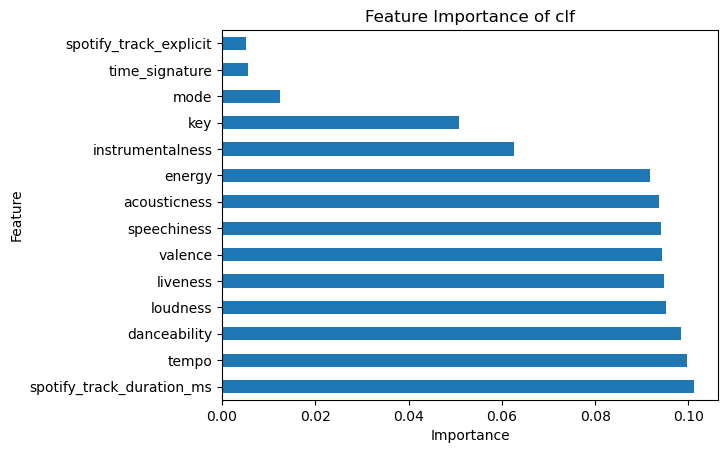

In [131]:
feat_importances = pd.Series(clf.feature_importances_, index = X_data_top10.columns)
feat_importances.nlargest(14).plot(kind = 'barh')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance of clf")

## Reseach Question #3 How do the audio features of a song correlates with its popularity?

In [12]:
df_numeric

WeekID  Week Position                            SongID  Instance  \
0      1965-07-17             34  Don't Just Stand TherePatty Duke         1   
1      1965-07-24             22  Don't Just Stand TherePatty Duke         1   
2      1965-07-31             14  Don't Just Stand TherePatty Duke         1   
3      1965-08-07             10  Don't Just Stand TherePatty Duke         1   
4      1965-08-14              8  Don't Just Stand TherePatty Duke         1   
...           ...            ...                               ...       ...   
330369 2011-07-02             42             You LieThe Band Perry         1   
330370 2011-07-09             42             You LieThe Band Perry         1   
330371 2011-07-16             44             You LieThe Band Perry         1   
330372 2011-07-23             51             You LieThe Band Perry         1   
330373 2011-07-30             59             You LieThe Band Perry         1   

        Peak Position  Weeks on Chart  spotify_track_duration_ms  \
0                  34               4                   163160.0   
1                  22               5                   163160.0   
2                  14               6                   163160.0   
3                  10               7                   163160.0   
4                   8               8                   163160.0   
...               ...             ...                        ...   
330369             42              16                   214733.0   
330370             42              17                   214733.0   
330371             42              18                   214733.0   
330372             42              19                   214733.0   
330373             42              20                   214733.0   

        danceability  energy  key  loudness  mode  speechiness  acousticness  \
0              0.574   0.256  7.0   -15.044   1.0       0.0298         0.610   
1              0.574   0.256  7.0   -15.044   1.0       0.0298         0.610   
2              0.574   0.256  7.0   -15.044   1.0       0.0298         0.610   
3              0.574   0.256  7.0   -15.044   1.0       0.0298         0.610   
4              0.574   0.256  7.0   -15.044   1.0       0.0298         0.610   
...              ...     ...  ...       ...   ...          ...           ...   
330369         0.521   0.656  6.0    -5.015   1.0       0.0289         0.387   
330370         0.521   0.656  6.0    -5.015   1.0       0.0289         0.387   
330371         0.521   0.656  6.0    -5.015   1.0       0.0289         0.387   
330372         0.521   0.656  6.0    -5.015   1.0       0.0289         0.387   
330373         0.521   0.656  6.0    -5.015   1.0       0.0289         0.387   

        instrumentalness  liveness  valence    tempo  time_signature  \
0               0.000077     0.100    0.568   82.331             3.0   
1               0.000077     0.100    0.568   82.331             3.0   
2               0.000077     0.100    0.568   82.331             3.0   
3               0.000077     0.100    0.568   82.331             3.0   
4               0.000077     0.100    0.568   82.331             3.0   
...                  ...       ...      ...      ...             ...   
330369          0.000000     0.143    0.598  170.939             4.0   
330370          0.000000     0.143    0.598  170.939             4.0   
330371          0.000000     0.143    0.598  170.939             4.0   
330372          0.000000     0.143    0.598  170.939             4.0   
330373          0.000000     0.143    0.598  170.939             4.0   

        spotify_track_popularity  
0                           21.0  
1                           21.0  
2                           21.0  
3                           21.0  
4                           21.0  
...                          ...  
330369                      50.0  
330370                      50.0  
330371                      50.0  
330372                      50.0  
330373                

In [13]:
df_numeric.set_index('SongID')

WeekID  Week Position  Instance  \
SongID                                                                 
Don't Just Stand TherePatty Duke 1965-07-17             34         1   
Don't Just Stand TherePatty Duke 1965-07-24             22         1   
Don't Just Stand TherePatty Duke 1965-07-31             14         1   
Don't Just Stand TherePatty Duke 1965-08-07             10         1   
Don't Just Stand TherePatty Duke 1965-08-14              8         1   
...                                     ...            ...       ...   
You LieThe Band Perry            2011-07-02             42         1   
You LieThe Band Perry            2011-07-09             42         1   
You LieThe Band Perry            2011-07-16             44         1   
You LieThe Band Perry            2011-07-23             51         1   
You LieThe Band Perry            2011-07-30             59         1   

                                  Peak Position  Weeks on Chart  \
SongID                                                            
Don't Just Stand TherePatty Duke             34               4   
Don't Just Stand TherePatty Duke             22               5   
Don't Just Stand TherePatty Duke             14               6   
Don't Just Stand TherePatty Duke             10               7   
Don't Just Stand TherePatty Duke              8               8   
...                                         ...             ...   
You LieThe Band Perry                        42              16   
You LieThe Band Perry                        42              17   
You LieThe Band Perry                        42              18   
You LieThe Band Perry                        42              19   
You LieThe Band Perry                        42              20   

                                  spotify_track_duration_ms  danceability  \
SongID                                                                      
Don't Just Stand TherePatty Duke                   163160.0         0.574   
Don't Just Stand TherePatty Duke                   163160.0         0.574   
Don't Just Stand TherePatty Duke                   163160.0         0.574   
Don't Just Stand TherePatty Duke                   163160.0         0.574   
Don't Just Stand TherePatty Duke                   163160.0         0.574   
...                                                     ...           ...   
You LieThe Band Perry                              214733.0         0.521   
You LieThe Band Perry                              214733.0         0.521   
You LieThe Band Perry                              214733.0         0.521   
You LieThe Band Perry                              214733.0         0.521   
You LieThe Band Perry                              214733.0         0.521   

                                  energy  key  loudness  mode  speechiness  \
SongID                                                                       
Don't Just Stand TherePatty Duke   0.256  7.0   -15.044   1.0       0.0298   
Don't Just Stand TherePatty Duke   0.256  7.0   -15.044   1.0       0.0298   
Don't Just Stand TherePatty Duke   0.256  7.0   -15.044   1.0       0.0298   
Don't Just Stand TherePatty Duke   0.256  7.0   -15.044   1.0       0.0298   
Don't Just Stand TherePatty Duke   0.256  7.0   -15.044   1.0       0.0298   
...                                  ...  ...       ...   ...          ...   
You LieThe Band Perry              0.656  6.0    -5.015   1.0       0.0289   
You LieThe Band Perry              0.656  6.0    -5.015   1.0       0.0289   
You LieThe Band Perry              0.656  6.0    -5.015   1.0       0.0289   
You LieThe Band Perry              0.656  6.0    -5.015   1.0       0.0289   
You LieThe Band Perry              0.656  6.0    -5.015   1.0       0.0289   

                                  acousticness  instrumentalness  liveness  \
SongID                                                                       
Don't Just Stand TherePatty Duke         0.610         

In [21]:
df_popularity_features = df_numeric.drop(['WeekID', 'Week Position', 'Instance', 'Peak Position', 'Weeks on Chart', 'SongID'], axis = 1)
df_popularity_features

spotify_track_duration_ms  danceability  energy  key  loudness  mode  \
0                        163160.0         0.574   0.256  7.0   -15.044   1.0   
1                        163160.0         0.574   0.256  7.0   -15.044   1.0   
2                        163160.0         0.574   0.256  7.0   -15.044   1.0   
3                        163160.0         0.574   0.256  7.0   -15.044   1.0   
4                        163160.0         0.574   0.256  7.0   -15.044   1.0   
...                           ...           ...     ...  ...       ...   ...   
330369                   214733.0         0.521   0.656  6.0    -5.015   1.0   
330370                   214733.0         0.521   0.656  6.0    -5.015   1.0   
330371                   214733.0         0.521   0.656  6.0    -5.015   1.0   
330372                   214733.0         0.521   0.656  6.0    -5.015   1.0   
330373                   214733.0         0.521   0.656  6.0    -5.015   1.0   

        speechiness  acousticness  instrumentalness  liveness  valence  \
0            0.0298         0.610          0.000077     0.100    0.568   
1            0.0298         0.610          0.000077     0.100    0.568   
2            0.0298         0.610          0.000077     0.100    0.568   
3            0.0298         0.610          0.000077     0.100    0.568   
4            0.0298         0.610          0.000077     0.100    0.568   
...             ...           ...               ...       ...      ...   
330369       0.0289         0.387          0.000000     0.143    0.598   
330370       0.0289         0.387          0.000000     0.143    0.598   
330371       0.0289         0.387          0.000000     0.143    0.598   
330372       0.0289         0.387          0.000000     0.143    0.598   
330373       0.0289         0.387          0.000000     0.143    0.598   

          tempo  time_signature  spotify_track_popularity  
0        82.331             3.0                      21.0  
1        82.331             3.0                      21.0  
2        82.331             3.0                      21.0  
3        82.331             3.0                      21.0  
4        82.331             3.0                      21.0  
...         ...             ...                       ...  
330369  170.939             4.0                      50.0  
330370  170.939             4.0                      50.0  
330371  170.939             4.0                      50.0  
330372  170.939             4.0                      50.0  
330373  170.939             4.0                      50.0  

[284784 rows x 14 columns]

In [18]:
df_popularity_features.columns

Index(['SongID', 'spotify_track_duration_ms', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature',
       'spotify_track_popularity'],
      dtype='object')

/Users/sklin22/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Scattergrams of the Audio Features')

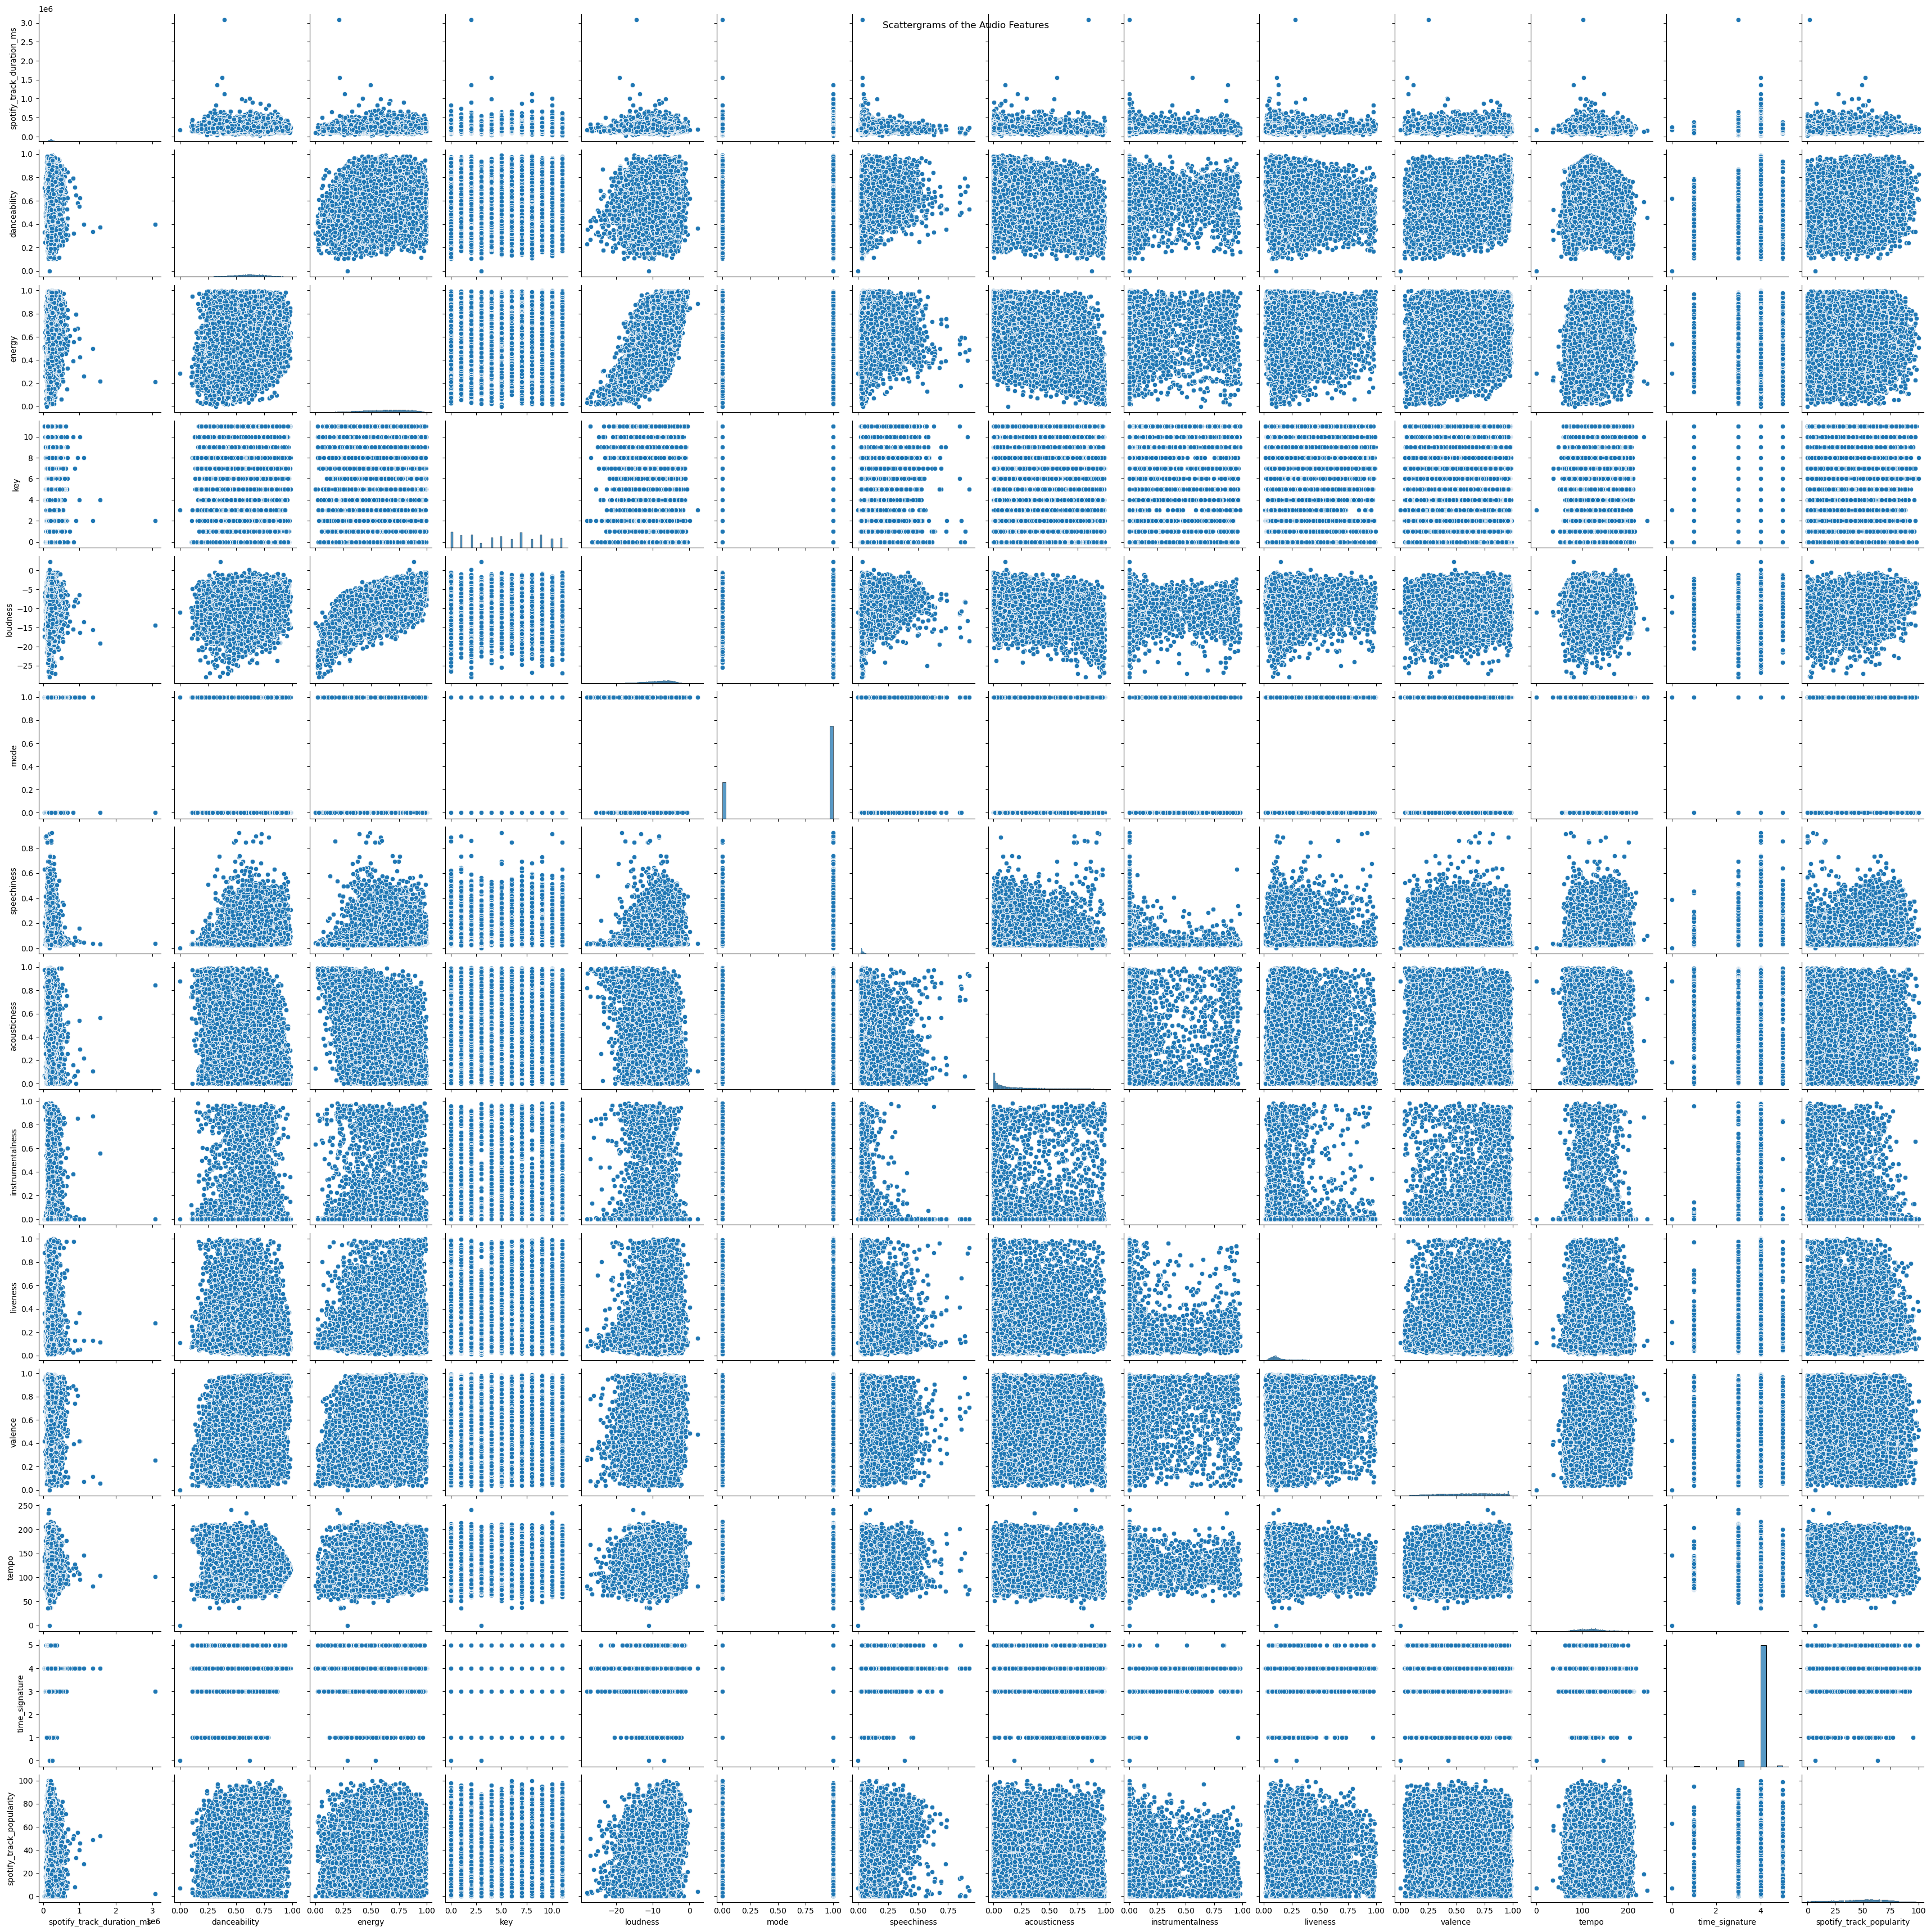

In [16]:
sns.pairplot(df_popularity_features)
plt.suptitle("Scattergrams of the Audio Features")

/Users/sklin22/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


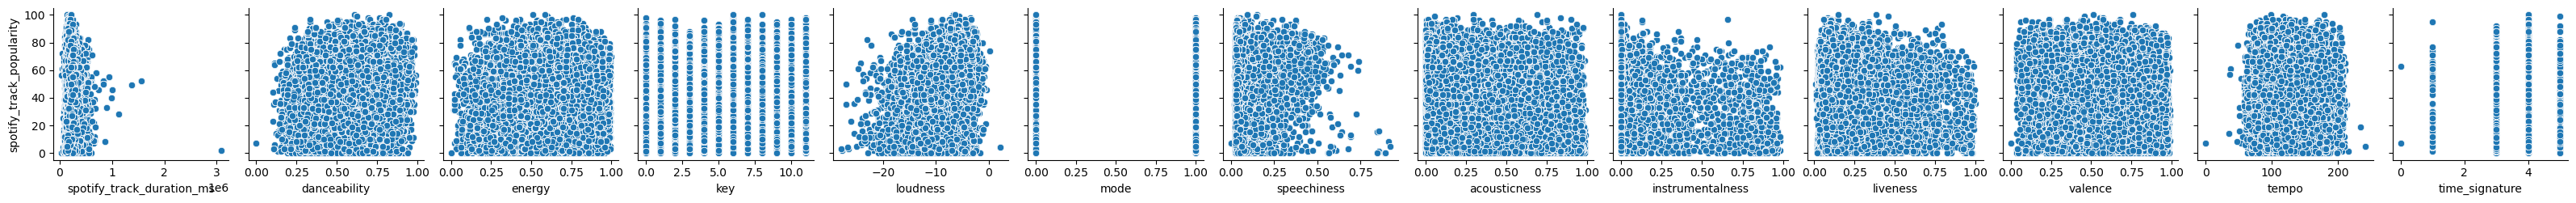

In [25]:
audio_features = ['spotify_track_duration_ms', 'danceability', 'energy', 'key','loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness','liveness', 'valence', 'tempo', 'time_signature']
sns.pairplot(data = df_popularity_features,y_vars = 'spotify_track_popularity', x_vars = audio_features)

In [24]:
df_popularity_features.corr()

spotify_track_duration_ms  danceability    energy  \
spotify_track_duration_ms                   1.000000      0.077360  0.086974   
danceability                                0.077360      1.000000  0.167224   
energy                                      0.086974      0.167224  1.000000   
key                                         0.010428      0.014896  0.021303   
loudness                                    0.003353      0.123172  0.680869   
mode                                       -0.112971     -0.175609 -0.092809   
speechiness                                 0.027437      0.255536  0.117386   
acousticness                               -0.255351     -0.302839 -0.573564   
instrumentalness                            0.025694     -0.003214 -0.003989   
liveness                                   -0.029413     -0.121658  0.114616   
valence                                    -0.143838      0.396811  0.354261   
tempo                                      -0.022884     -0.176475  0.141971   
time_signature                              0.065982      0.204504  0.208374   
spotify_track_popularity                    0.131092      0.160721  0.162593   

                                key  loudness      mode  speechiness  \
spotify_track_duration_ms  0.010428  0.003353 -0.112971     0.027437   
danceability               0.014896  0.123172 -0.175609     0.255536   
energy                     0.021303  0.680869 -0.092809     0.117386   
key                        1.000000  0.009384 -0.136554     0.029939   
loudness                   0.009384  1.000000 -0.070122     0.150808   
mode                      -0.136554 -0.070122  1.000000    -0.138159   
speechiness                0.029939  0.150808 -0.138159     1.000000   
acousticness              -0.020652 -0.403669  0.143469    -0.154900   
instrumentalness          -0.000174 -0.137956 -0.012490    -0.053906   
liveness                   0.000131  0.036630  0.014136     0.075668   
valence                    0.013944  0.023077 -0.040635     0.010000   
tempo                     -0.011962  0.077406  0.025487     0.042429   
time_signature             0.007489  0.116020 -0.050951     0.079339   
spotify_track_popularity  -0.001286  0.363991 -0.094466     0.167636   

                           acousticness  instrumentalness  liveness   valence  \
spotify_track_duration_ms     -0.255351          0.025694 -0.029413 -0.143838   
danceability                  -0.302839         -0.003214 -0.121658  0.396811   
energy                        -0.573564         -0.003989  0.114616  0.354261   
key                           -0.020652         -0.000174  0.000131  0.013944   
loudness                      -0.403669         -0.137956  0.036630  0.023077   
mode                           0.143469         -0.012490  0.014136 -0.040635   
speechiness                   -0.154900         -0.053906  0.075668  0.010000   
acousticness                   1.000000          0.030954  0.026890 -0.131445   
instrumentalness               0.030954          1.000000 -0.010108  0.045690   
liveness                       0.026890         -0.010108  1.000000  0.027859   
valence                       -0.131445          0.045690  0.027859  1.000000   
tempo                         -0.087086          0.000041  0.019430  0.057815   
time_signature                -0.199424          0.000178 -0.016642  0.130342   
spotify_track_popularity      -0.279073         -0.129722 -0.076234 -0.195615   

                              tempo  time_signature  spotify_track_popularity  
spotify_track_duration_ms -0.022884        0.065982                  0.131092  
danceability              -0.176475        0.204504                  0.160721  
energy                     0.141971        0.208374                  0.162593  
key                       -0.011962        0.007489                 -0.001286  
loudness                   0.077406        0.116020                  0.363991  
mode                       0.025487       -0.0509

Text(0.5, 1.0, 'Correlation Coefficients across each Variable')

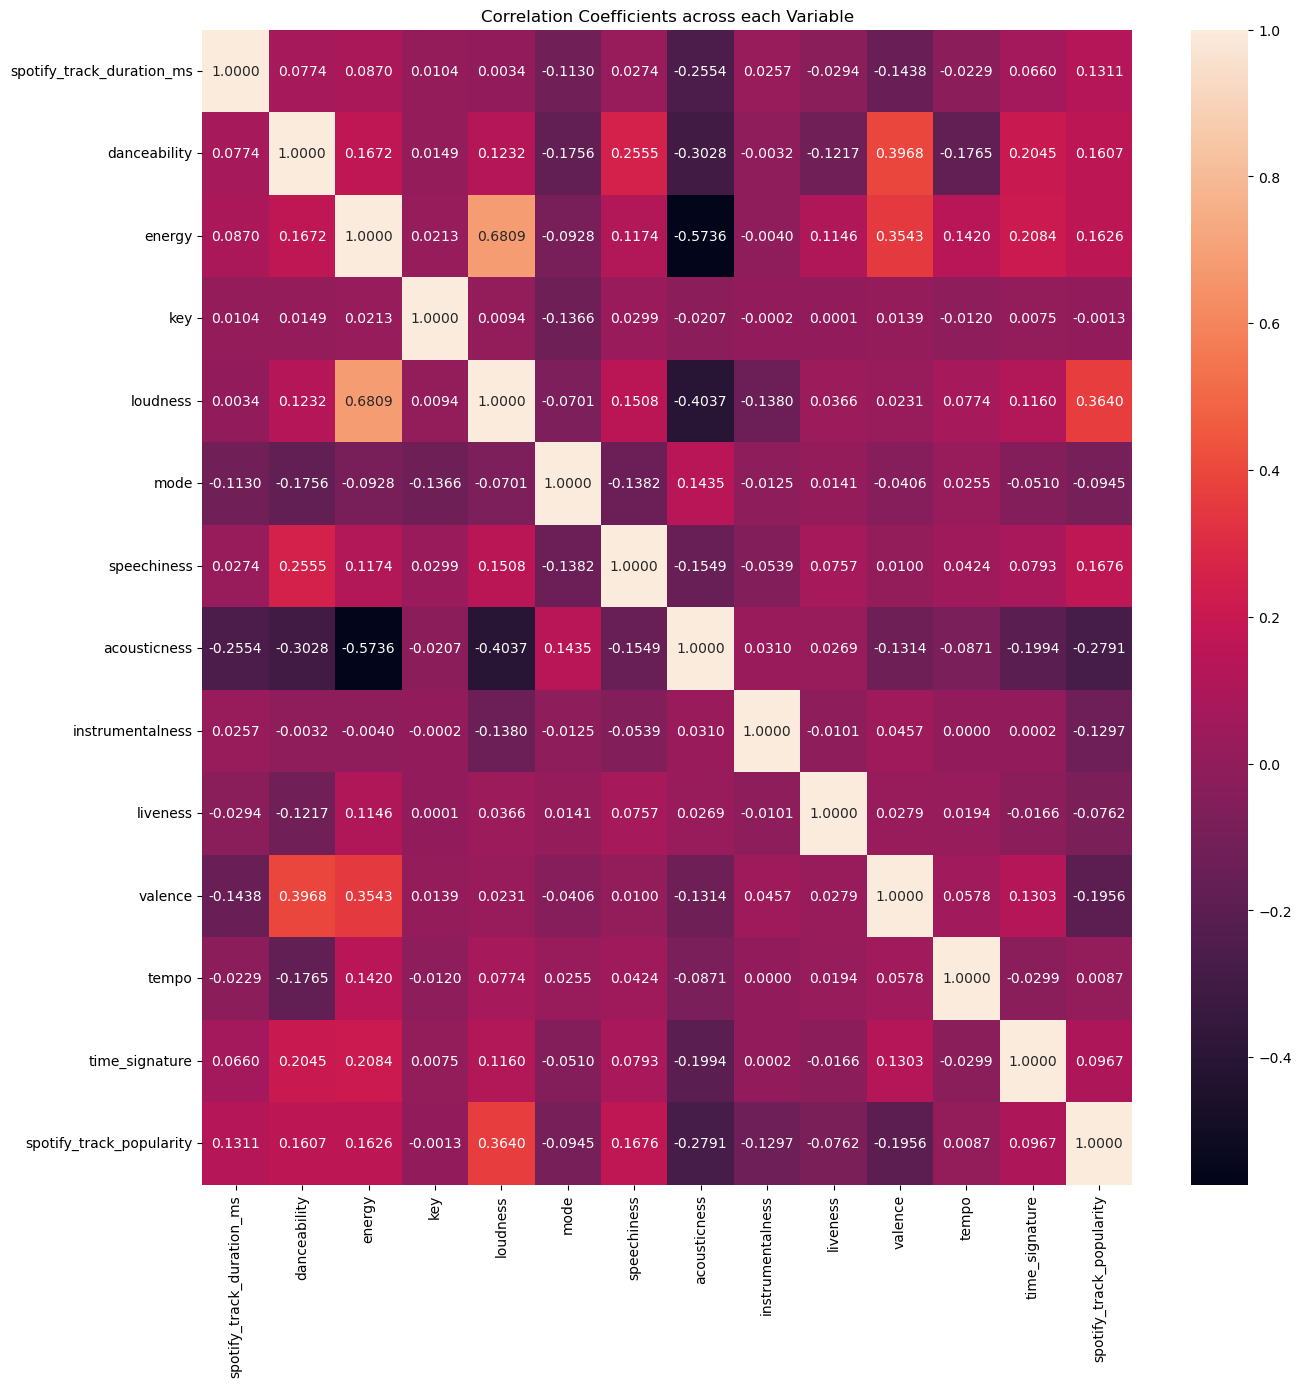

In [23]:
plt.figure(figsize = (15, 15))
sns.heatmap(df_popularity_features.corr(), annot = True, fmt = ".4f")
plt.title("Correlation Coefficients across each Variable")

## Which Genres remained popular over time?

In [ ]:
split_genres = df_filtered['spotify_genre'].str.replace('[', '').str.replace(']', '').str.split(', ').explode()
Week_ID = df_filtered['WeekID']
genre_counts ={}
for date, genre in zip(Week_ID, split_genres):
    if date not in genre_counts:
        genre_counts[date] = {}
    if genre in genre_counts[date]:
        genre_counts[date][genre] += 1
    else:
        genre_counts[date][genre] = 1
        
plt.figure(figsize=(12, 8))

for date, counts in genre_counts.items():
    for genre, count in counts.items():
        plt.plot(date, count, marker='o', label=genre)

plt.title('Popularity of Genres Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place legend outside the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()


## How has the prevalence and popularity of explicit songs in the BillBoard top 100 changed throughout time?

In [19]:
df_filtered

index_x     WeekID  Week Position                            SongID  \
0             0 1965-07-17             34  Don't Just Stand TherePatty Duke   
1             1 1965-07-24             22  Don't Just Stand TherePatty Duke   
2             2 1965-07-31             14  Don't Just Stand TherePatty Duke   
3             3 1965-08-07             10  Don't Just Stand TherePatty Duke   
4             4 1965-08-14              8  Don't Just Stand TherePatty Duke   
...         ...        ...            ...                               ...   
330369   296347 2011-07-02             42             You LieThe Band Perry   
330370   296348 2011-07-09             42             You LieThe Band Perry   
330371   296349 2011-07-16             44             You LieThe Band Perry   
330372   296350 2011-07-23             51             You LieThe Band Perry   
330373   296351 2011-07-30             59             You LieThe Band Perry   

        Instance  Peak Position  Weeks on Chart  \
0              1             34               4   
1              1             22               5   
2              1             14               6   
3              1             10               7   
4              1              8               8   
...          ...            ...             ...   
330369         1             42              16   
330370         1             42              17   
330371         1             42              18   
330372         1             42              19   
330373         1             42              20   

                                            spotify_genre  \
0                                ['deep adult standards']   
1                                ['deep adult standards']   
2                                ['deep adult standards']   
3                                ['deep adult standards']   
4                                ['deep adult standards']   
...                                                   ...   
330369  ['contemporary country', 'country', 'country d...   
330370  ['contemporary country', 'country', 'country d...   
330371  ['contemporary country', 'country', 'country d...   
330372  ['contemporary country', 'country', 'country d...   
330373  ['contemporary country', 'country', 'country d...   

        spotify_track_duration_ms spotify_track_explicit  ...  loudness  mode  \
0                        163160.0                  False  ...   -15.044   1.0   
1                        163160.0                  False  ...   -15.044   1.0   
2                        163160.0                  False  ...   -15.044   1.0   
3                        163160.0                  False  ...   -15.044   1.0   
4                        163160.0                  False  ...   -15.044   1.0   
...                           ...                    ...  ...       ...   ...   
330369                   214733.0                  False  ...    -5.015   1.0   
330370                   214733.0                  False  ...    -5.015   1.0   
330371                   214733.0                  False  ...    -5.015   1.0   
330372                   214733.0                  False  ...    -5.015   1.0   
330373                   214733.0                  False  ...    -5.015   1.0   

        speechiness  acousticness  instrumentalness  liveness  valence  \
0            0.0298         0.610          0.000077     0.100    0.568   
1            0.0298         0.610          0.000077     0.100    0.568   
2            0.0298         0.610          0.000077     0.100    0.568   
3            0.0298         0.610          0.000077     0.100    0.568   
4            0.0298         0.610          0.000077     0.100    0.568   
...             ...           ...               ...       ...      ...   
330369       0.0289         0.387          0.000000     0.143    0.598   
330370       0.0289         0.387          0.000000     0.143    0.598   
330371       0.0289         0.387          0.000000     0.143    0.598   


In [55]:
df_explicit = df_filtered.copy()
df_explicit['spotify_track_explicit'] = df_explicit['spotify_track_explicit'].astype(int)
df_explicit = df_explicit[df_explicit['spotify_track_explicit'] == 1]

In [56]:
df_explicit

index_x     WeekID  Week Position  \
234         150 1996-11-30             67   
235        3746 1997-01-18             22   
236       34795 1996-12-07             58   
237       57837 1997-01-25             19   
238       77685 1996-12-14             42   
...         ...        ...            ...   
330246   296224 2007-10-20             52   
330247   296225 2007-10-27             57   
330248   296226 2007-11-03             67   
330249   296227 2007-11-10             80   
330250   296228 2007-11-17             96   

                                               SongID  Instance  \
234                          Cold Rock A PartyMC Lyte         1   
235                          Cold Rock A PartyMC Lyte         1   
236                          Cold Rock A PartyMC Lyte         1   
237                          Cold Rock A PartyMC Lyte         1   
238                          Cold Rock A PartyMC Lyte         1   
...                                               ...       ...   
330246  You Know What It IsT.I. Featuring Wyclef Jean         1   
330247  You Know What It IsT.I. Featuring Wyclef Jean         1   
330248  You Know What It IsT.I. Featuring Wyclef Jean         1   
330249  You Know What It IsT.I. Featuring Wyclef Jean         1   
330250  You Know What It IsT.I. Featuring Wyclef Jean         1   

        Peak Position  Weeks on Chart  \
234                67               1   
235                22               8   
236                58               2   
237                19               9   
238                42               3   
...               ...             ...   
330246             34              14   
330247             34              15   
330248             34              16   
330249             34              17   
330250             34              18   

                                            spotify_genre  \
234     ['east coast hip hop', 'electro', 'gangster ra...   
235     ['east coast hip hop', 'electro', 'gangster ra...   
236     ['east coast hip hop', 'electro', 'gangster ra...   
237     ['east coast hip hop', 'electro', 'gangster ra...   
238     ['east coast hip hop', 'electro', 'gangster ra...   
...                                                   ...   
330246  ['atl hip hop', 'dance pop', 'dirty south rap'...   
330247  ['atl hip hop', 'dance pop', 'dirty south rap'...   
330248  ['atl hip hop', 'dance pop', 'dirty south rap'...   
330249  ['atl hip hop', 'dance pop', 'dirty south rap'...   
330250  ['atl hip hop', 'dance pop', 'dirty south rap'...   

        spotify_track_duration_ms  spotify_track_explicit  ...  loudness  \
234                      247306.0                       1  ...    -5.239   
235                      247306.0                       1  ...    -5.239   
236                      247306.0                       1  ...    -5.239   
237                      247306.0                       1  ...    -5.239   
238                      247306.0                       1  ...    -5.239   
...                           ...                     ...  ...       ...   
330246                   287133.0                       1  ...    -4.757   
330247                   287133.0                       1  ...    -4.757   
330248                   287133.0                       1  ...    -4.757   
330249                   287133.0                       1  ...    -4.757   
330250                   287133.0                       1  ...    -4.757   

        mode  speechiness  acousticness  instrumentalness  liveness  valence  \
234      0.0        0.246         0.192          0.000001    0.1080    0.744   
235      0.0        0.246         0.192          0.000001    0.1080    0.744   
236      0.0        0.246         0.192          0.000001    0.1080    0.744   
237      0.0        0.246         0.192          0.000001    0.1080    0.744   
238      0.0        0.246         0.192          0.000001    0.1080    0.744   
...      ...          ...           ...    

In [84]:
## seeing the number of explicit songs in the billboard top 100 per year. This can include the same song if it was in the top 100 for multiple weeks. 
df_explicit_year['year'] = pd.to_datetime(df_explicit['WeekID']).dt.year
total_explicit_yearly = df_explicit_year.groupby('year')['spotify_track_explicit'].sum()
total_explicit_yearly
## 2021 is low, is it because the dataset stops during the year 2021? So not a full year of data

year
1966       1
1969      14
1970       7
1971       5
1977       7
1978       4
1980       4
1981       6
1984      19
1985      13
1987      23
1988      31
1989      18
1990      28
1991     112
1992     222
1993     414
1994     576
1995     560
1996     442
1997     564
1998     740
1999     566
2000     765
2001     938
2002     976
2003     999
2004    1120
2005    1354
2006     976
2007    1097
2008     892
2009     862
2010     951
2011    1101
2012    1215
2013    1168
2014    1183
2015    1552
2016    2006
2017    1942
2018    2440
2019    2900
2020    1282
2021     444
Name: spotify_track_explicit, dtype: int64

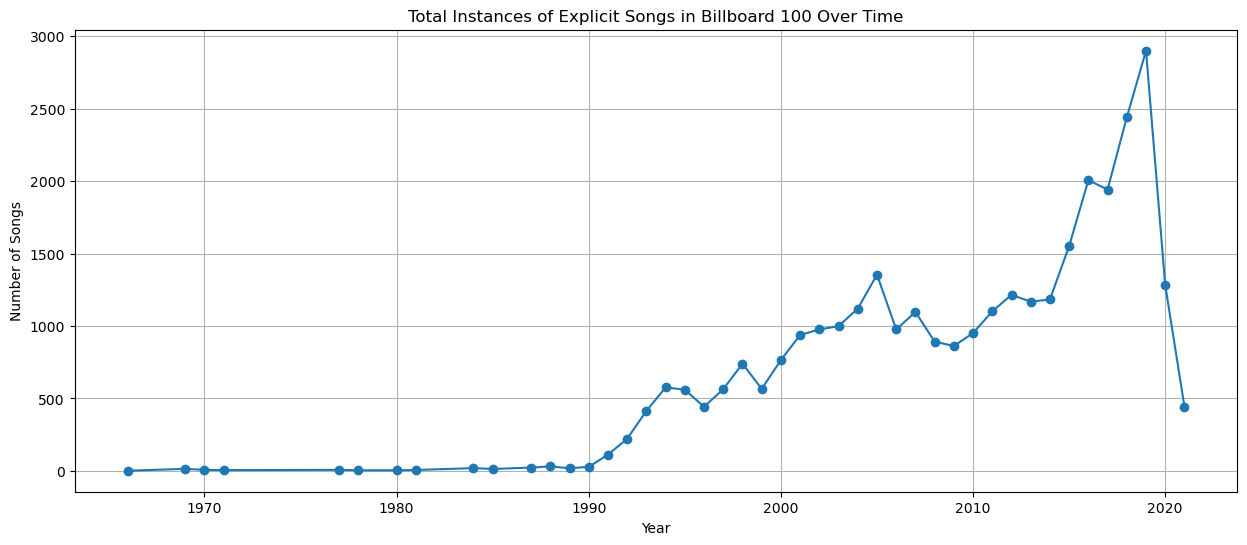

In [83]:
plt.figure(figsize=(15, 6))
plt.plot(total_explicit_yearly.index, total_explicit_yearly.values, marker='o', linestyle='-')
plt.title('Total Instances of Explicit Songs in Billboard 100 Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.grid(True)
plt.show()

In [76]:
songs_1969_explicit = df_explicit[(pd.to_datetime(df_explicit['WeekID'])>= "1969-01-01") & (pd.to_datetime(df_explicit['WeekID'])<= "1969-12-31")]
songs_1969_explicit
## song entries end in May of 2021. 

index_x     WeekID  Week Position                    SongID  Instance  \
292175   104474 1969-08-02            100  In A MomentThe Intrigues         1   
292176   122314 1969-08-23             63  In A MomentThe Intrigues         1   
292177   139376 1969-08-16             80  In A MomentThe Intrigues         1   
292178   175024 1969-08-09             89  In A MomentThe Intrigues         1   
292179   176251 1969-08-30             57  In A MomentThe Intrigues         1   
292180   208973 1969-09-13             50  In A MomentThe Intrigues         1   
292181   215878 1969-09-06             56  In A MomentThe Intrigues         1   
292182   230435 1969-09-27             41  In A MomentThe Intrigues         1   
292183   237704 1969-10-04             33  In A MomentThe Intrigues         1   
292184   242891 1969-10-11             31  In A MomentThe Intrigues         1   
292185   304215 1969-09-20             47  In A MomentThe Intrigues         1   
292186   305800 1969-10-25             40  In A MomentThe Intrigues         1   
292187   309733 1969-11-01             46  In A MomentThe Intrigues         1   
292188   324284 1969-10-18             34  In A MomentThe Intrigues         1   

        Peak Position  Weeks on Chart spotify_genre  \
292175            100               1            []   
292176             63               4            []   
292177             80               3            []   
292178             89               2            []   
292179             57               5            []   
292180             50               7            []   
292181             56               6            []   
292182             41               9            []   
292183             33              10            []   
292184             31              11            []   
292185             47               8            []   
292186             31              13            []   
292187             31              14            []   
292188             31              12            []   

        spotify_track_duration_ms  spotify_track_explicit  ...  loudness  \
292175                   168961.0                       1  ...    -5.612   
292176                   168961.0                       1  ...    -5.612   
292177                   168961.0                       1  ...    -5.612   
292178                   168961.0                       1  ...    -5.612   
292179                   168961.0                       1  ...    -5.612   
292180                   168961.0                       1  ...    -5.612   
292181                   168961.0                       1  ...    -5.612   
292182                   168961.0                       1  ...    -5.612   
292183                   168961.0                       1  ...    -5.612   
292184                   168961.0                       1  ...    -5.612   
292185                   168961.0                       1  ...    -5.612   
292186                   168961.0                       1  ...    -5.612   
292187                   168961.0                       1  ...    -5.612   
292188                   168961.0                       1  ...    -5.612   

        mode  speechiness  acousticness  instrumentalness  liveness  valence  \
292175   1.0       0.0431         0.215               0.0     0.202    0.966   
292176   1.0       0.0431         0.215               0.0     0.202    0.966   
292177   1.0       0.0431         0.215               0.0     0.202    0.966   
292178   1.0       0.0431         0.215               0.0     0.202    0.966   
292179   1.0       0.0431         0.215               0.0     0.202    0.966   
292180   1.0       0.0431         0.215               0.0     0.202    0.966   
292181   1.0       0.0431         0.215               0.0     0.202    0.966   
292182   1.0       0.0431         0.215               0.0     0.202    0.966   
292183   1.0       0.0431         0.215               0.0     0.202    0.966   
292184   1.0       0.0431

In [75]:
songs_2021_explicit = df_explicit[(pd.to_datetime(df_explicit['WeekID'])>= "2021-01-01") & (pd.to_datetime(df_explicit['WeekID'])<= "2021-12-31")]
songs_2021_explicit
## song entries end in May of 2021. 

index_x     WeekID  Week Position                  SongID  Instance  \
8093      57296 2021-01-02             14  PositionsAriana Grande         1   
8094      93080 2021-01-09              2  PositionsAriana Grande         1   
8095      98629 2021-01-16              2  PositionsAriana Grande         1   
8100     186220 2021-01-23              3  PositionsAriana Grande         1   
8101     190955 2021-01-30              5  PositionsAriana Grande         1   
...         ...        ...            ...                     ...       ...   
329727   295705 2021-03-27             78          You Got ItVEDO         3   
329728   295706 2021-04-03             88          You Got ItVEDO         3   
329729   295707 2021-04-10             97          You Got ItVEDO         3   
329730   295708 2021-04-17             87          You Got ItVEDO         3   
329731   295709 2021-05-01             95          You Got ItVEDO         4   

        Peak Position  Weeks on Chart                          spotify_genre  \
8093                1               9  ['dance pop', 'pop', 'post-teen pop']   
8094                1              10  ['dance pop', 'pop', 'post-teen pop']   
8095                1              11  ['dance pop', 'pop', 'post-teen pop']   
8100                1              12  ['dance pop', 'pop', 'post-teen pop']   
8101                1              13  ['dance pop', 'pop', 'post-teen pop']   
...               ...             ...                                    ...   
329727             75              12                     ['pop r&b', 'r&b']   
329728             75              13                     ['pop r&b', 'r&b']   
329729             75              14                     ['pop r&b', 'r&b']   
329730             75              15                     ['pop r&b', 'r&b']   
329731             95              16                     ['pop r&b', 'r&b']   

        spotify_track_duration_ms  spotify_track_explicit  ...  loudness  \
8093                     172324.0                       1  ...    -4.771   
8094                     172324.0                       1  ...    -4.771   
8095                     172324.0                       1  ...    -4.771   
8100                     172324.0                       1  ...    -4.771   
8101                     172324.0                       1  ...    -4.771   
...                           ...                     ...  ...       ...   
329727                   203144.0                       1  ...    -8.937   
329728                   203144.0                       1  ...    -8.937   
329729                   203144.0                       1  ...    -8.937   
329730                   203144.0                       1  ...    -8.937   
329731                   203144.0                       1  ...    -8.937   

        mode  speechiness  acousticness  instrumentalness  liveness  valence  \
8093     1.0       0.0878         0.468               0.0    0.0931    0.682   
8094     1.0       0.0878         0.468               0.0    0.0931    0.682   
8095     1.0       0.0878         0.468               0.0    0.0931    0.682   
8100     1.0       0.0878         0.468               0.0    0.0931    0.682   
8101     1.0       0.0878         0.468               0.0    0.0931    0.682   
...      ...          ...           ...               ...       ...      ...   
329727   1.0       0.1870         0.143               0.0    0.1180    0.394   
329728   1.0       0.1870         0.143               0.0    0.1180    0.394   
329729   1.0       0.1870         0.143               0.0    0.1180    0.394   
329730   1.0       0.1870         0.143               0.0    0.1180    0.394   
329731   1.0       0.1870         0.143               0.0    0.1180    0.394   

          tempo  time_signature  spotify_track_popularity  
8093    144.015             4.0                      89.0  
8094    144.015             4.0                      89.0  
8095    144.015             4.0             

In [80]:
## testing for no song duplicates
num_explicit_songs_yearly = df_explicit_year.groupby(['year', 'SongID'])['spotify_track_explicit'].nunique()
tot_explicit_songs_yearly = num_explicit_songs_yearly.groupby('year').sum()
tot_explicit_songs_yearly

year
1966      1
1969      1
1970      1
1971      2
1977      1
1978      1
1980      1
1981      1
1984      1
1985      1
1987      2
1988      3
1989      2
1990      2
1991      9
1992     18
1993     37
1994     51
1995     55
1996     41
1997     51
1998     63
1999     51
2000     67
2001     71
2002     71
2003     77
2004     84
2005    109
2006     83
2007     83
2008     83
2009     84
2010    111
2011    124
2012    111
2013    118
2014    103
2015    159
2016    202
2017    261
2018    399
2019    308
2020    286
2021     77
Name: spotify_track_explicit, dtype: int64

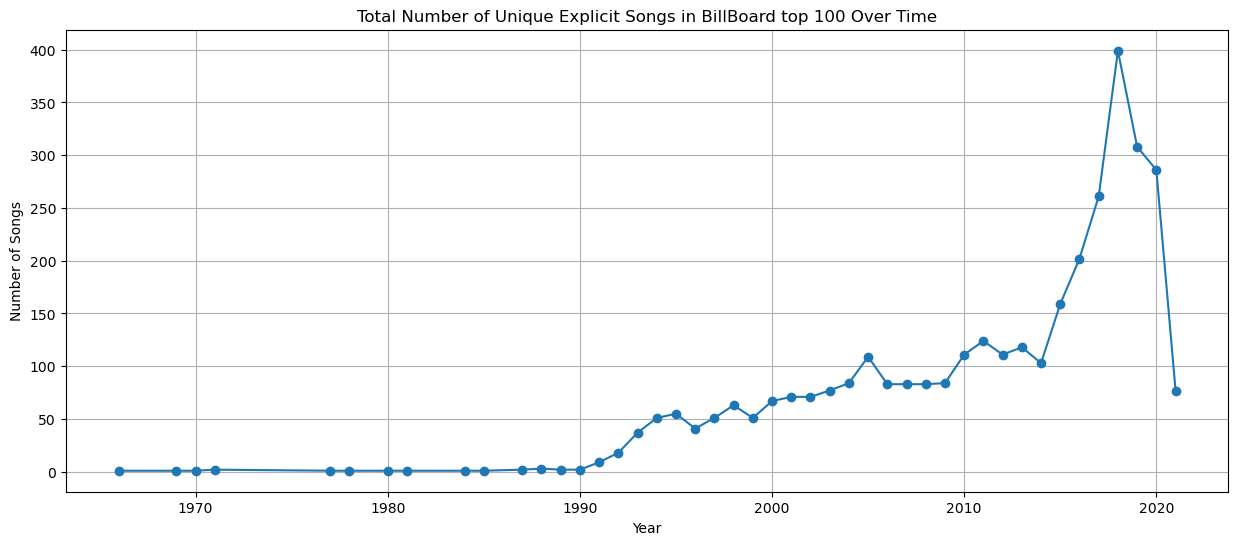

In [82]:
plt.figure(figsize=(15, 6))
plt.plot(tot_explicit_songs_yearly.index, tot_explicit_songs_yearly.values, marker='o', linestyle='-')
plt.title('Total Number of Unique Explicit Songs in BillBoard top 100 Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.grid(True)
plt.show()

In [64]:
#df_explicit_year = df_explicit.copy()
yearly_explicit = df_explicit_year.groupby('year')['spotify_track_popularity'].mean()

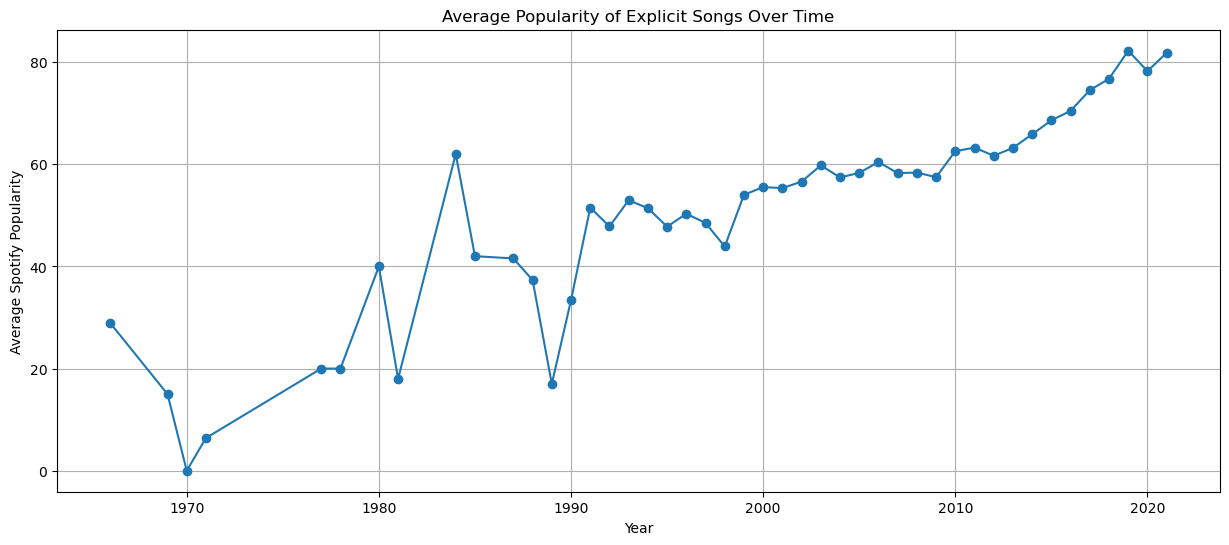

In [61]:
plt.figure(figsize=(15, 6))
plt.plot(yearly_explicit.index, yearly_explicit.values, marker='o', linestyle='-')
plt.title('Average Popularity of Explicit Songs Over Time')
plt.xlabel('Year')
plt.ylabel('Average Spotify Popularity')
plt.grid(True)
plt.show()